In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-test-scores-of-students/test_scores.csv
/kaggle/input/wine-quality-dataset/WineQT.csv
/kaggle/input/phishing-website-detector/phishing.txt
/kaggle/input/phishing-website-detector/phishing.csv
/kaggle/input/breast-cancer-wisconsin-diagnostic-dataset/brca.csv


## Carga de los datasets

In [10]:
cancer = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-diagnostic-dataset/brca.csv')

cancer

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


In [11]:
# eliminar una columna
cancer.drop("Unnamed: 0", axis=1, inplace=True)

In [56]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [5]:
estudiantes = pd.read_csv('/kaggle/input/predict-test-scores-of-students/test_scores.csv')

estudiantes

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [12]:
vinos = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')

vinos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [6]:
phishing = pd.read_csv('/kaggle/input/phishing-website-detector/phishing.csv')

phishing

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [7]:
# eliminar una columna
phishing.drop("Index", axis=1, inplace=True)

In [9]:
phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirecting//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  InfoEmail            1

### Hemos añadido 2 metricas nuevas, ROC AUC y Balanced Accuracy

- ROC AUC: Esta métrica evalúa la capacidad del modelo para distinguir entre clases a diferentes umbrales de decisión. Calcula el área bajo la curva ROC, donde un valor de 1 indica una perfecta discriminación y 0.5 equivale a un desempeño aleatorio.

- Balanced Accuracy: Es la media aritmética de la sensibilidad (recall) y la especificidad, lo que permite evaluar el rendimiento del modelo de manera justa en casos de clases desbalanceadas. Proporciona una visión equilibrada de cómo se desempeña el modelo en cada clase.

## Algoritmo: SVM(Support Vector Machine). En español: Máquina de vectores de soporte 

### En que consiste: Las SVM buscan el hiperplano que separa dos clases de datos de la forma más clara y segura posible, maximizando la distancia entre las muestras de cada clase y el hiperplano. 
- Al utilizar técnicas de kernel, este método se extiende a problemas complejos donde la separación no es evidente en el espacio original, permitiendo una mayor precisión en la clasificación

## Aplicacion al dataset de phising

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = phishing.drop("class", axis=1) 
y = phishing["class"]                

# Suponiendo que ya tienes X (características) e y (etiquetas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Inicializamos SVM con parámetros por defecto
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predicción de clases
y_pred = svm_model.predict(X_test)

# Predicción de probabilidades (para AUC-ROC)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Cálculo de las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
aucroc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Imprimir resultados
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("AUC-ROC: {:.4f}".format(aucroc))
print("Balanced Accuracy: {:.4f}".format(balanced_acc))

Accuracy: 0.9512
Precision: 0.9413
Recall: 0.9733
F1-Score: 0.9570
AUC-ROC: 0.9890
Balanced Accuracy: 0.9482


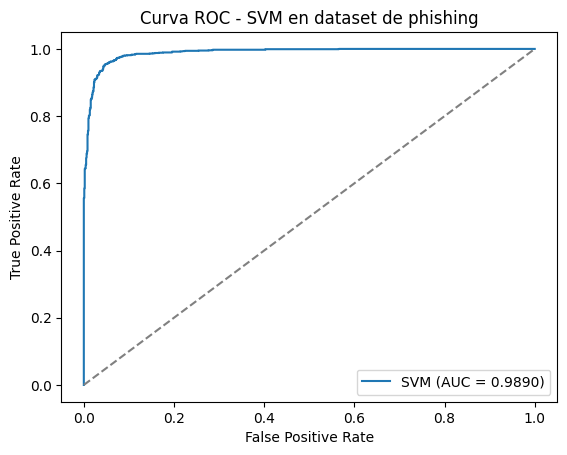

In [18]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='SVM (AUC = {:.4f})'.format(aucroc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - SVM en dataset de phishing")
plt.legend()
plt.show()

### Ahora con hiperparametros

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definimos el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1]
}

# Inicializamos el modelo SVM con probability=True para obtener probabilidades
svm = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(estimator=svm,
                           param_grid=param_grid,
                           cv=5,
                           scoring='balanced_accuracy',  # Puedes cambiar a 'f1' o cualquier otra métrica
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y la puntuación obtenida en validación cruzada
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search.best_score_))

# Utilizar el mejor modelo para predecir en el conjunto de prueba
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
y_pred_best_proba = best_svm.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
aucroc_best = roc_auc_score(y_test, y_pred_best_proba)
balanced_acc_best = balanced_accuracy_score(y_test, y_pred_best)

print("Resultados del modelo SVM con ajuste de hiperparámetros:")
print("Accuracy: {:.4f}".format(accuracy_best))
print("Precision: {:.4f}".format(precision_best))
print("Recall: {:.4f}".format(recall_best))
print("F1-Score: {:.4f}".format(f1_best))
print("AUC-ROC: {:.4f}".format(aucroc_best))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros encontrados:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor balanced accuracy en CV: 0.9638
Resultados del modelo SVM con ajuste de hiperparámetros:
Accuracy: 0.9688
Precision: 0.9649
Recall: 0.9798
F1-Score: 0.9723
AUC-ROC: 0.9915
Balanced Accuracy: 0.9673


### Explicación de Cada Hiperparámetro
- C:
Valores bajos (por ejemplo, 0.1) permiten un margen más amplio, pero pueden permitir más errores en el entrenamiento.
Valores altos (por ejemplo, 10) tratan de clasificar correctamente cada instancia, lo que podría conducir a sobreajuste.

- kernel:
linear: Útil cuando los datos son linealmente separables.
rbf: Kernel radial, bueno para datos no linealmente separables, pues transforma los datos a un espacio de mayor dimensión.
poly: Kernel polinómico, que puede capturar relaciones más complejas, pero aumenta la complejidad del modelo.

- gamma:
Controla la influencia de un solo punto de entrenamiento.
Valores pequeños (por ejemplo, 0.001) indican una influencia amplia, mientras que valores grandes (por ejemplo, 0.1) indican una influencia más cercana, pudiendo llevar a sobreajuste.

## Aplicacion al dataset de vinos

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Convertir 'quality' en una variable binaria
vinos['label'] = (vinos['quality'] > 5).astype(int)

# Definir las características (X) y la variable objetivo (y)
# Eliminamos 'quality', 'Id' y 'label' para quedarnos solo con las variables predictoras en X
X = vinos.drop(['quality', 'Id', 'label'], axis=1)
y = vinos['label']              

# Suponiendo que ya tienes X (características) e y (etiquetas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Inicializamos SVM con parámetros por defecto
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predicción de clases
y_pred = svm_model.predict(X_test)

# Predicción de probabilidades (para AUC-ROC)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Cálculo de las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
aucroc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Imprimir resultados
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("AUC-ROC: {:.4f}".format(aucroc))
print("Balanced Accuracy: {:.4f}".format(balanced_acc))

Accuracy: 0.6812
Precision: 0.6517
Recall: 0.9134
F1-Score: 0.7607
AUC-ROC: 0.7478
Balanced Accuracy: 0.6528


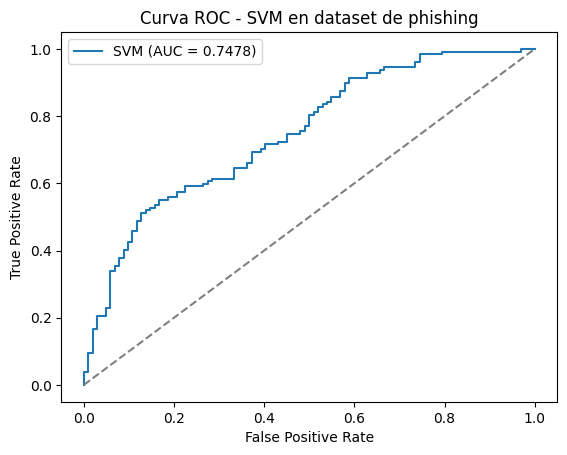

In [27]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='SVM (AUC = {:.4f})'.format(aucroc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - SVM en dataset de vinos")
plt.legend()
plt.show()

### Ahora con hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definimos el grid de hiperparámetros
param_grid = {
    'C': [0.1, 5],
    'kernel': ['linear', 'poly'],
    'gamma': [0.01, 0.1]
}

# Inicializamos el modelo SVM con probability=True para obtener probabilidades
svm = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(estimator=svm,
                           param_grid=param_grid,
                           cv=5,
                           scoring='balanced_accuracy',  # Puedes cambiar a 'f1' o cualquier otra métrica
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y la puntuación obtenida en validación cruzada
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search.best_score_))

# Utilizar el mejor modelo para predecir en el conjunto de prueba
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
y_pred_best_proba = best_svm.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
aucroc_best = roc_auc_score(y_test, y_pred_best_proba)
balanced_acc_best = balanced_accuracy_score(y_test, y_pred_best)

print("Resultados del modelo SVM con ajuste de hiperparámetros:")
print("Accuracy: {:.4f}".format(accuracy_best))
print("Precision: {:.4f}".format(precision_best))
print("Recall: {:.4f}".format(recall_best))
print("F1-Score: {:.4f}".format(f1_best))
print("AUC-ROC: {:.4f}".format(aucroc_best))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best))

## Dataset de cancer de mamas

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

X = cancer.drop("y", axis=1) 
y = cancer["y"]                

# Convertir la variable objetivo a numérico (por ejemplo: B=0, M=1)
le = LabelEncoder()
y = le.fit_transform(y)

# Suponiendo que ya tienes X (características) e y (etiquetas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Inicializamos SVM con parámetros por defecto
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predicción de clases
y_pred = svm_model.predict(X_test)

# Predicción de probabilidades (para AUC-ROC)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Cálculo de las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
aucroc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Imprimir resultados
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("AUC-ROC: {:.4f}".format(aucroc))
print("Balanced Accuracy: {:.4f}".format(balanced_acc))

Accuracy: 0.9298
Precision: 0.9487
Recall: 0.8605
F1-Score: 0.9024
AUC-ROC: 0.9718
Balanced Accuracy: 0.9161


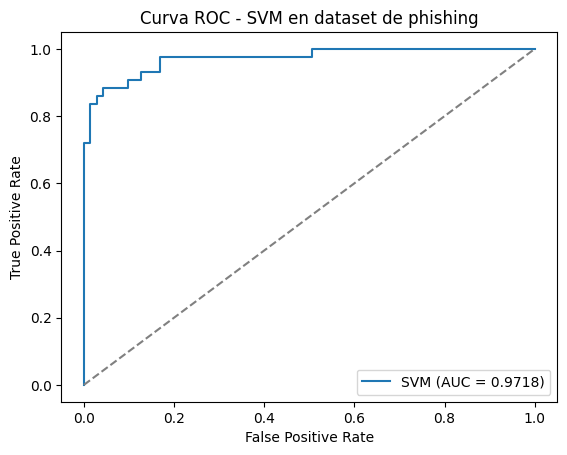

In [36]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='SVM (AUC = {:.4f})'.format(aucroc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - SVM en dataset de cancer")
plt.legend()
plt.show()

### Ahora con hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definimos el grid de hiperparámetros
param_grid = {
    'C': [0.1, 5],
    'kernel': ['linear', 'poly'],
    'gamma': [0.01, 0.1]
}

# Inicializamos el modelo SVM con probability=True para obtener probabilidades
svm = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(estimator=svm,
                           param_grid=param_grid,
                           cv=5,
                           scoring='balanced_accuracy',  # Puedes cambiar a 'f1' o cualquier otra métrica
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y la puntuación obtenida en validación cruzada
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search.best_score_))

# Utilizar el mejor modelo para predecir en el conjunto de prueba
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
y_pred_best_proba = best_svm.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
aucroc_best = roc_auc_score(y_test, y_pred_best_proba)
balanced_acc_best = balanced_accuracy_score(y_test, y_pred_best)

print("Resultados del modelo SVM con ajuste de hiperparámetros:")
print("Accuracy: {:.4f}".format(accuracy_best))
print("Precision: {:.4f}".format(precision_best))
print("Recall: {:.4f}".format(recall_best))
print("F1-Score: {:.4f}".format(f1_best))
print("AUC-ROC: {:.4f}".format(aucroc_best))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best))

## Dataset de estudiantes

In [40]:
# Crear la variable target: performance
# Usamos la mediana de 'posttest' como umbral
median_posttest = estudiantes['posttest'].median()
estudiantes['performance'] = (estudiantes['posttest'] >= median_posttest).astype(int)

# Identificamos las columnas categóricas
categorical_cols = ['school', 'school_setting', 'school_type', 'classroom', 
                      'teaching_method', 'gender', 'lunch']

# Aplicamos One-Hot Encoding a las variables categóricas (drop_first para evitar multicolinealidad)
students_df_encoded = pd.get_dummies(estudiantes, columns=categorical_cols, drop_first=True)

# Definimos las características (X) y la variable objetivo (y)
# Eliminamos 'student_id' (identificador), 'posttest' (se usó para target) y 'performance' del conjunto de features
X_students = students_df_encoded.drop(['student_id', 'posttest', 'performance'], axis=1)
y_students = students_df_encoded['performance']

from sklearn.model_selection import train_test_split

X_train_students, X_test_students, y_train_students, y_test_students = train_test_split(
    X_students, y_students, test_size=0.2, random_state=42)

from sklearn.svm import SVC

# Inicializamos el modelo SVM
svm_students = SVC(probability=True, random_state=42)
svm_students.fit(X_train_students, y_train_students)

# Realizamos las predicciones
y_pred_students = svm_students.predict(X_test_students)
y_pred_students_proba = svm_students.predict_proba(X_test_students)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_students = accuracy_score(y_test_students, y_pred_students)
precision_students = precision_score(y_test_students, y_pred_students)
recall_students = recall_score(y_test_students, y_pred_students)
f1_students = f1_score(y_test_students, y_pred_students)
aucroc_students = roc_auc_score(y_test_students, y_pred_students_proba)
balanced_acc_students = balanced_accuracy_score(y_test_students, y_pred_students)

print("Resultados SVM (default) para el dataset de estudiantes:")
print("Accuracy: {:.4f}".format(accuracy_students))
print("Precision: {:.4f}".format(precision_students))
print("Recall: {:.4f}".format(recall_students))
print("F1-Score: {:.4f}".format(f1_students))
print("AUC-ROC: {:.4f}".format(aucroc_students))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_students))


Resultados SVM (default) para el dataset de estudiantes:
Accuracy: 0.9133
Precision: 0.9018
Recall: 0.9309
F1-Score: 0.9161
AUC-ROC: 0.9785
Balanced Accuracy: 0.9131


### Ajustado con hiperparametros

In [41]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 5],
    'kernel': ['linear','poly'],
    'gamma': [0.01, 0.1]
}

# Inicializamos el modelo SVM para ajuste
svm_students_tune = SVC(probability=True, random_state=42)

grid_search_students = GridSearchCV(estimator=svm_students_tune,
                                    param_grid=param_grid,
                                    cv=5,
                                    scoring='balanced_accuracy',  # Se usa balanced_accuracy como métrica de evaluación
                                    n_jobs=-1,
                                    verbose=1)

grid_search_students.fit(X_train_students, y_train_students)

# Imprimir los mejores hiperparámetros y la puntuación obtenida en CV
print("Mejores hiperparámetros para el dataset de estudiantes:")
print(grid_search_students.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_students.best_score_))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores hiperparámetros para el dataset de estudiantes:
{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mejor balanced accuracy en CV: 0.9372


In [ ]:
# Extraer el mejor modelo SVM
best_svm_students = grid_search_students.best_estimator_

y_pred_best_students = best_svm_students.predict(X_test_students)
y_pred_best_students_proba = best_svm_students.predict_proba(X_test_students)[:, 1]

accuracy_best_students = accuracy_score(y_test_students, y_pred_best_students)
precision_best_students = precision_score(y_test_students, y_pred_best_students)
recall_best_students = recall_score(y_test_students, y_pred_best_students)
f1_best_students = f1_score(y_test_students, y_pred_best_students)
aucroc_best_students = roc_auc_score(y_test_students, y_pred_best_students_proba)
balanced_acc_best_students = balanced_accuracy_score(y_test_students, y_pred_best_students)

print("Resultados del modelo SVM ajustado para el dataset de estudiantes:")
print("Accuracy: {:.4f}".format(accuracy_best_students))
print("Precision: {:.4f}".format(precision_best_students))
print("Recall: {:.4f}".format(recall_best_students))
print("F1-Score: {:.4f}".format(f1_best_students))
print("AUC-ROC: {:.4f}".format(aucroc_best_students))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_students))


## Regresion Logistica

### La regresión logística es una técnica de análisis de datos que utiliza las matemáticas para encontrar las relaciones entre dos factores de datos. Luego, utiliza esta relación para predecir el valor de uno de esos factores basándose en el otro

## Dataset de phising RL

In [42]:
from sklearn.linear_model import LogisticRegression

# Definir características y variable objetivo
X = phishing.drop("class", axis=1)
y = phishing["class"]

# División en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Realizar predicciones de clase y de probabilidades (para AUC-ROC)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
aucroc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

print("Resultados Regresión Logística (default) en dataset de phishing:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("AUC-ROC: {:.4f}".format(aucroc))
print("Balanced Accuracy: {:.4f}".format(balanced_acc))

Resultados Regresión Logística (default) en dataset de phishing:
Accuracy: 0.9335
Precision: 0.9297
Recall: 0.9530
F1-Score: 0.9412
AUC-ROC: 0.9804
Balanced Accuracy: 0.9309


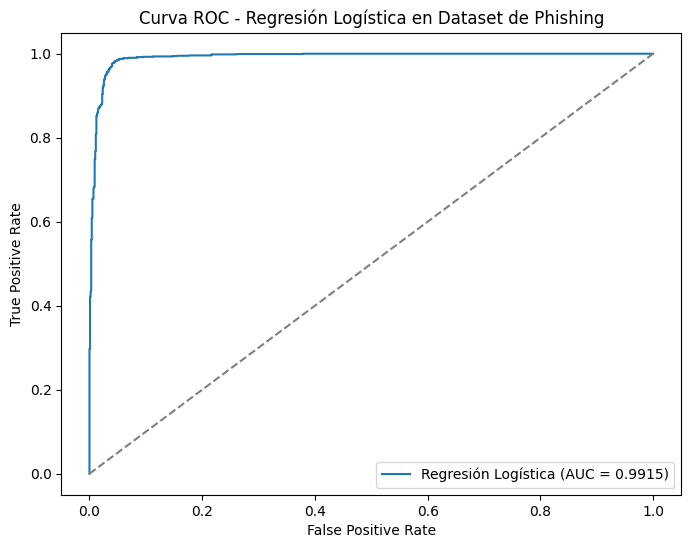

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Regresión Logística (AUC = {:.4f})'.format(aucroc_best))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística en Dataset de Phishing")
plt.legend()
plt.show()


### Ajuste hiperparametros

- penalty:

Permite elegir entre regularización L1 y L2.

L1: Ideal cuando se sospecha que algunas características no aportan información (puede eliminar coeficientes).

L2: Favorece modelos más estables sin eliminar completamente variables.
- C:

Controla la fuerza de la regularización.

Valores pequeños (e.g., 0.1) imponen una fuerte penalización y pueden simplificar el modelo, mientras que valores altos (e.g., 10) permiten mayor flexibilidad, con riesgo de sobreajuste.
- max_iter:

Establece el número máximo de iteraciones para la convergencia del algoritmo.

Un mayor número (e.g., 500) asegura que el algoritmo tenga suficiente tiempo para converger, especialmente cuando se aplican fuertes regularizaciones o se trabaja con datasets complejos.

In [44]:
from sklearn.model_selection import GridSearchCV

# Inicializar el modelo con solver 'liblinear'
logreg_tune = LogisticRegression(solver='liblinear', random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 5],
    'max_iter': [100, 200]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=logreg_tune,
                           param_grid=param_grid,
                           cv=5,
                           scoring='balanced_accuracy',  # Se evalúa usando balanced_accuracy
                           n_jobs=-1,
                           verbose=1)

# Ejecutar la búsqueda en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y la puntuación obtenida
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search.best_score_))

# Extraer el mejor estimador
best_logreg = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
y_pred_best = best_logreg.predict(X_test)
y_pred_best_proba = best_logreg.predict_proba(X_test)[:, 1]

# Calcular las métricas
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
aucroc_best = roc_auc_score(y_test, y_pred_best_proba)
balanced_acc_best = balanced_accuracy_score(y_test, y_pred_best)

print("Resultados de Regresión Logística ajustada en dataset de phishing:")
print("Accuracy: {:.4f}".format(accuracy_best))
print("Precision: {:.4f}".format(precision_best))
print("Recall: {:.4f}".format(recall_best))
print("F1-Score: {:.4f}".format(f1_best))
print("AUC-ROC: {:.4f}".format(aucroc_best))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores hiperparámetros encontrados:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
Mejor balanced accuracy en CV: 0.9236
Resultados de Regresión Logística ajustada en dataset de phishing:
Accuracy: 0.9340
Precision: 0.9291
Recall: 0.9547
F1-Score: 0.9417
AUC-ROC: 0.9799
Balanced Accuracy: 0.9312


## Dataset de vinos RL

In [45]:
# Crear la variable target: 'label' (1: buena calidad, 0: mala calidad)
vinos['label'] = (vinos['quality'] > 5).astype(int)

# Definir X: todas las columnas de características excepto 'quality', 'Id' y 'label'
X_wine = vinos.drop(['quality', 'Id', 'label'], axis=1)
# La variable objetivo
y_wine = vinos['label']

from sklearn.model_selection import train_test_split

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

# Inicializamos y entrenamos el modelo
logreg_wine = LogisticRegression(random_state=42)
logreg_wine.fit(X_train_wine, y_train_wine)

# Realizamos las predicciones de clase y obtenemos las probabilidades para la clase positiva
y_pred_wine = logreg_wine.predict(X_test_wine)
y_pred_wine_proba = logreg_wine.predict_proba(X_test_wine)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_wine = accuracy_score(y_test_wine, y_pred_wine)
precision_wine = precision_score(y_test_wine, y_pred_wine)
recall_wine = recall_score(y_test_wine, y_pred_wine)
f1_wine = f1_score(y_test_wine, y_pred_wine)
aucroc_wine = roc_auc_score(y_test_wine, y_pred_wine_proba)
balanced_acc_wine = balanced_accuracy_score(y_test_wine, y_pred_wine)

print("Resultados Regresión Logística (default) para el dataset de vinos:")
print("Accuracy: {:.4f}".format(accuracy_wine))
print("Precision: {:.4f}".format(precision_wine))
print("Recall: {:.4f}".format(recall_wine))
print("F1-Score: {:.4f}".format(f1_wine))
print("AUC-ROC: {:.4f}".format(aucroc_wine))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_wine))


Resultados Regresión Logística (default) para el dataset de vinos:
Accuracy: 0.7555
Precision: 0.7710
Recall: 0.7953
F1-Score: 0.7829
AUC-ROC: 0.8260
Balanced Accuracy: 0.7506


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


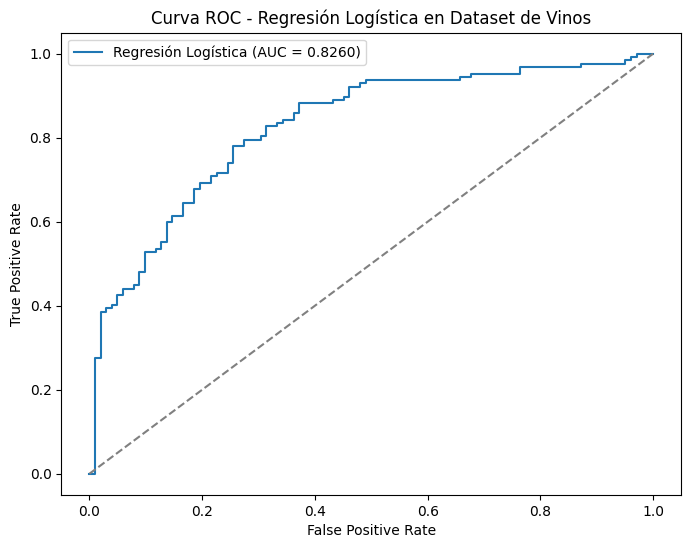

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_wine, y_pred_wine_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Regresión Logística (AUC = {:.4f})'.format(aucroc_wine))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística en Dataset de Vinos")
plt.legend()
plt.show()

### Ajuste de hiperparametros

In [50]:
from sklearn.model_selection import GridSearchCV

# Inicializamos el modelo con el solver 'liblinear'
logreg_wine_tune = LogisticRegression(solver='liblinear', random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 5],
    'max_iter': [100, 200]
}

grid_search_wine = GridSearchCV(estimator=logreg_wine_tune,
                                param_grid=param_grid,
                                cv=5,
                                scoring='balanced_accuracy',  # Usamos balanced_accuracy para evaluar
                                n_jobs=-1,
                                verbose=1)

grid_search_wine.fit(X_train_wine, y_train_wine)

print("Mejores hiperparámetros encontrados para el dataset de vinos:")
print(grid_search_wine.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_wine.best_score_))

# Extraer el mejor modelo
best_logreg_wine = grid_search_wine.best_estimator_

y_pred_best_wine = best_logreg_wine.predict(X_test_wine)
y_pred_best_wine_proba = best_logreg_wine.predict_proba(X_test_wine)[:, 1]

accuracy_best_wine = accuracy_score(y_test_wine, y_pred_best_wine)
precision_best_wine = precision_score(y_test_wine, y_pred_best_wine)
recall_best_wine = recall_score(y_test_wine, y_pred_best_wine)
f1_best_wine = f1_score(y_test_wine, y_pred_best_wine)
aucroc_best_wine = roc_auc_score(y_test_wine, y_pred_best_wine_proba)
balanced_acc_best_wine = balanced_accuracy_score(y_test_wine, y_pred_best_wine)

print("Resultados de Regresión Logística ajustada para el dataset de vinos:")
print("Accuracy: {:.4f}".format(accuracy_best_wine))
print("Precision: {:.4f}".format(precision_best_wine))
print("Recall: {:.4f}".format(recall_best_wine))
print("F1-Score: {:.4f}".format(f1_best_wine))
print("AUC-ROC: {:.4f}".format(aucroc_best_wine))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_wine))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores hiperparámetros encontrados para el dataset de vinos:
{'C': 5, 'max_iter': 100, 'penalty': 'l2'}
Mejor balanced accuracy en CV: 0.7506
Resultados de Regresión Logística ajustada para el dataset de vinos:
Accuracy: 0.7511
Precision: 0.7692
Recall: 0.7874
F1-Score: 0.7782
AUC-ROC: 0.8262
Balanced Accuracy: 0.7466


## Dataset de cancer de mamas RL

In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Separar características y variable objetivo
X_cancer = cancer.drop("y", axis=1)
y_cancer = cancer["y"]

# Convertir la variable objetivo (por ejemplo, "B" y "M") a numérico
le = LabelEncoder()
y_cancer = le.fit_transform(cancer["y"])  # Ahora, y_cancer contendrá 0 y 1

from sklearn.model_selection import train_test_split

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

# Inicializamos y entrenamos el modelo
logreg_cancer = LogisticRegression(random_state=42)
logreg_cancer.fit(X_train_cancer, y_train_cancer)

# Realizamos predicciones de clase y obtenemos las probabilidades para la clase positiva
y_pred_cancer = logreg_cancer.predict(X_test_cancer)
y_pred_cancer_proba = logreg_cancer.predict_proba(X_test_cancer)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_cancer = accuracy_score(y_test_cancer, y_pred_cancer)
precision_cancer = precision_score(y_test_cancer, y_pred_cancer)
recall_cancer = recall_score(y_test_cancer, y_pred_cancer)
f1_cancer = f1_score(y_test_cancer, y_pred_cancer)
aucroc_cancer = roc_auc_score(y_test_cancer, y_pred_cancer_proba)
balanced_acc_cancer = balanced_accuracy_score(y_test_cancer, y_pred_cancer)

print("Resultados Regresión Logística (default) en dataset de cáncer de mamas:")
print("Accuracy: {:.4f}".format(accuracy_cancer))
print("Precision: {:.4f}".format(precision_cancer))
print("Recall: {:.4f}".format(recall_cancer))
print("F1-Score: {:.4f}".format(f1_cancer))
print("AUC-ROC: {:.4f}".format(aucroc_cancer))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_cancer))

Resultados Regresión Logística (default) en dataset de cáncer de mamas:
Accuracy: 0.9474
Precision: 0.8936
Recall: 0.9767
F1-Score: 0.9333
AUC-ROC: 0.9902
Balanced Accuracy: 0.9532


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


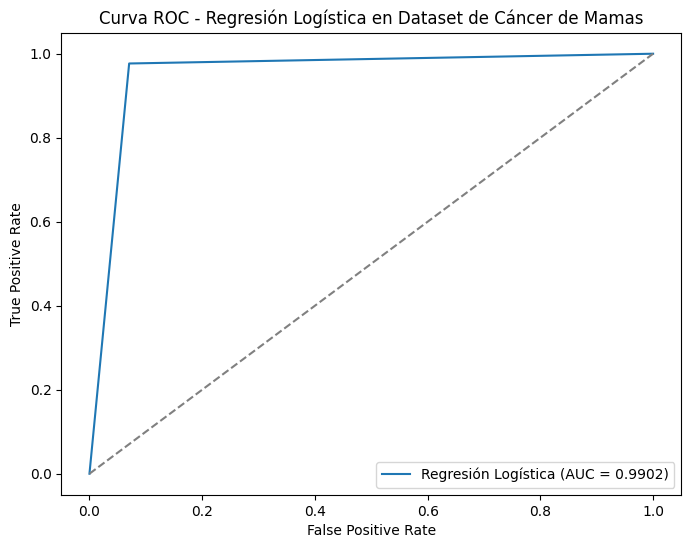

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_cancer, y_pred_cancer)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Regresión Logística (AUC = {:.4f})'.format(aucroc_cancer))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística en Dataset de Cáncer de Mamas")
plt.legend()
plt.show()

### Ajuste de hiperparametros

In [64]:
from sklearn.model_selection import GridSearchCV

# Inicializamos el modelo con solver 'liblinear' para admitir tanto L1 como L2
logreg_cancer_tune = LogisticRegression(solver='liblinear', random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'max_iter': [100, 200, 500]
}

grid_search_cancer = GridSearchCV(estimator=logreg_cancer_tune,
                                  param_grid=param_grid,
                                  cv=5,
                                  scoring='balanced_accuracy',  # Se evalúa usando balanced_accuracy
                                  n_jobs=-1,
                                  verbose=1)

grid_search_cancer.fit(X_train_cancer, y_train_cancer)

print("Mejores hiperparámetros encontrados para el dataset de cáncer:")
print(grid_search_cancer.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_cancer.best_score_))

# Extraer el mejor estimador
best_logreg_cancer = grid_search_cancer.best_estimator_

# Predicciones en el conjunto de prueba
y_pred_best_cancer = best_logreg_cancer.predict(X_test_cancer)
y_pred_best_cancer_proba = best_logreg_cancer.predict_proba(X_test_cancer)[:, 1]

# Cálculo de métricas
accuracy_best_cancer = accuracy_score(y_test_cancer, y_pred_best_cancer)
precision_best_cancer = precision_score(y_test_cancer, y_pred_best_cancer)
recall_best_cancer = recall_score(y_test_cancer, y_pred_best_cancer)
f1_best_cancer = f1_score(y_test_cancer, y_pred_best_cancer)
aucroc_best_cancer = roc_auc_score(y_test_cancer, y_pred_best_cancer_proba)
balanced_acc_best_cancer = balanced_accuracy_score(y_test_cancer, y_pred_best_cancer)

print("Resultados de Regresión Logística ajustada en dataset de cáncer de mamas:")
print("Accuracy: {:.4f}".format(accuracy_best_cancer))
print("Precision: {:.4f}".format(precision_best_cancer))
print("Recall: {:.4f}".format(recall_best_cancer))
print("F1-Score: {:.4f}".format(f1_best_cancer))
print("AUC-ROC: {:.4f}".format(aucroc_best_cancer))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_cancer))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros encontrados para el dataset de cáncer:
{'C': 10, 'max_iter': 100, 'penalty': 'l2'}
Mejor balanced accuracy en CV: 0.9522
Resultados de Regresión Logística ajustada en dataset de cáncer de mamas:
Accuracy: 0.9561
Precision: 0.9318
Recall: 0.9535
F1-Score: 0.9425
AUC-ROC: 0.9931
Balanced Accuracy: 0.9556


## Dataset estudiantes RL

In [65]:
# Crear la variable target "performance" basada en el postest
median_posttest = estudiantes['posttest'].median()
estudiantes['performance'] = (estudiantes['posttest'] >= median_posttest).astype(int)

# Identificamos las columnas categóricas a codificar
categorical_cols = ['school', 'school_setting', 'school_type', 'classroom', 
                      'teaching_method', 'gender', 'lunch']

# Aplicar One-Hot Encoding (drop_first=True para evitar multicolinealidad)
students_df_encoded = pd.get_dummies(estudiantes, columns=categorical_cols, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
# Se eliminan 'student_id', 'posttest' y 'performance' (este último se asigna a y)
X_students = students_df_encoded.drop(['student_id', 'posttest', 'performance'], axis=1)
y_students = students_df_encoded['performance']

from sklearn.model_selection import train_test_split

X_train_students, X_test_students, y_train_students, y_test_students = train_test_split(
    X_students, y_students, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

# Inicializar y entrenar el modelo con parámetros por defecto
logreg_students = LogisticRegression(random_state=42)
logreg_students.fit(X_train_students, y_train_students)

# Realizar predicciones de clase y obtener las probabilidades para la clase positiva
y_pred_students = logreg_students.predict(X_test_students)
y_pred_students_proba = logreg_students.predict_proba(X_test_students)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_students = accuracy_score(y_test_students, y_pred_students)
precision_students = precision_score(y_test_students, y_pred_students)
recall_students = recall_score(y_test_students, y_pred_students)
f1_students = f1_score(y_test_students, y_pred_students)
aucroc_students = roc_auc_score(y_test_students, y_pred_students_proba)
balanced_acc_students = balanced_accuracy_score(y_test_students, y_pred_students)

print("Resultados Regresión Logística (default) para el dataset de estudiantes:")
print("Accuracy: {:.4f}".format(accuracy_students))
print("Precision: {:.4f}".format(precision_students))
print("Recall: {:.4f}".format(recall_students))
print("F1-Score: {:.4f}".format(f1_students))
print("AUC-ROC: {:.4f}".format(aucroc_students))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_students))


Resultados Regresión Logística (default) para el dataset de estudiantes:
Accuracy: 0.9368
Precision: 0.9398
Recall: 0.9355
F1-Score: 0.9376
AUC-ROC: 0.9854
Balanced Accuracy: 0.9368


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


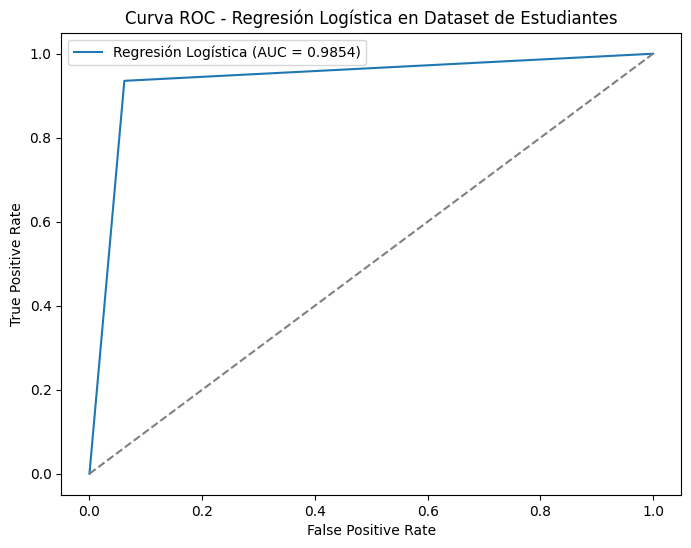

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_students, y_pred_students)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Regresión Logística (AUC = {:.4f})'.format(aucroc_students))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística en Dataset de Estudiantes")
plt.legend()
plt.show()


### Ajuste de hiperparametros

In [69]:
from sklearn.model_selection import GridSearchCV

# Inicializamos el modelo con solver 'liblinear'
logreg_students_tune = LogisticRegression(solver='liblinear', random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'max_iter': [100, 200, 500]
}

grid_search_students = GridSearchCV(estimator=logreg_students_tune,
                                    param_grid=param_grid,
                                    cv=5,
                                    scoring='balanced_accuracy',  # Se evalúa usando balanced_accuracy
                                    n_jobs=-1,
                                    verbose=1)

grid_search_students.fit(X_train_students, y_train_students)

print("Mejores hiperparámetros para el dataset de estudiantes:")
print(grid_search_students.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_students.best_score_))

# Extraer el mejor estimador
best_logreg_students = grid_search_students.best_estimator_

# Predicciones en el conjunto de prueba
y_pred_best_students = best_logreg_students.predict(X_test_students)
y_pred_best_students_proba = best_logreg_students.predict_proba(X_test_students)[:, 1]

# Cálculo de métricas
accuracy_best_students = accuracy_score(y_test_students, y_pred_best_students)
precision_best_students = precision_score(y_test_students, y_pred_best_students)
recall_best_students = recall_score(y_test_students, y_pred_best_students)
f1_best_students = f1_score(y_test_students, y_pred_best_students)
aucroc_best_students = roc_auc_score(y_test_students, y_pred_best_students_proba)
balanced_acc_best_students = balanced_accuracy_score(y_test_students, y_pred_best_students)

print("Resultados de Regresión Logística ajustada para el dataset de estudiantes:")
print("Accuracy: {:.4f}".format(accuracy_best_students))
print("Precision: {:.4f}".format(precision_best_students))
print("Recall: {:.4f}".format(recall_best_students))
print("F1-Score: {:.4f}".format(f1_best_students))
print("AUC-ROC: {:.4f}".format(aucroc_best_students))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_students))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros para el dataset de estudiantes:
{'C': 1, 'max_iter': 100, 'penalty': 'l1'}
Mejor balanced accuracy en CV: 0.9424
Resultados de Regresión Logística ajustada para el dataset de estudiantes:
Accuracy: 0.9415
Precision: 0.9364
Recall: 0.9493
F1-Score: 0.9428
AUC-ROC: 0.9858
Balanced Accuracy: 0.9413


## Árboles de Decisión 

#### Un árbol de decisiones es una herramienta visual que ayuda a empresas y particulares a tomar decisiones mediante la visualización de los posibles resultados y consecuencias. Visualizar el proceso de toma de decisiones permite a los usuarios sopesar diferentes oportunidades y trazar un camino hacia el resultado deseado

## Dataset phishing Arb

In [70]:
# Definir características (X) y variable objetivo (y)
X = phishing.drop("class", axis=1)
y = phishing["class"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier

# Inicializamos el modelo con parámetros por defecto
tree_default = DecisionTreeClassifier(random_state=42)
tree_default.fit(X_train, y_train)

# Realizamos las predicciones y obtenemos las probabilidades
y_pred_tree = tree_default.predict(X_test)
y_pred_tree_proba = tree_default.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
aucroc_tree = roc_auc_score(y_test, y_pred_tree_proba)
balanced_acc_tree = balanced_accuracy_score(y_test, y_pred_tree)

print("Resultados Árboles de Decisión (default):")
print("Accuracy: {:.4f}".format(accuracy_tree))
print("Precision: {:.4f}".format(precision_tree))
print("Recall: {:.4f}".format(recall_tree))
print("F1-Score: {:.4f}".format(f1_tree))
print("AUC-ROC: {:.4f}".format(aucroc_tree))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_tree))


Resultados Árboles de Decisión (default):
Accuracy: 0.9602
Precision: 0.9674
Recall: 0.9611
F1-Score: 0.9643
AUC-ROC: 0.9732
Balanced Accuracy: 0.9601


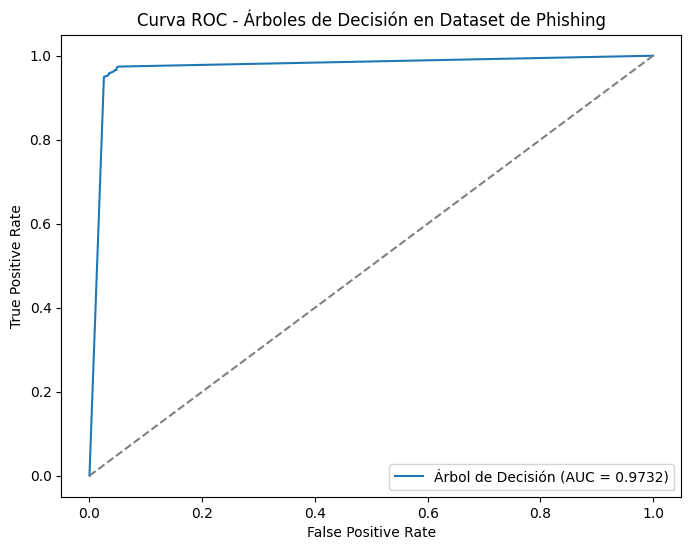

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.4f})'.format(aucroc_tree))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Árboles de Decisión en Dataset de Phishing")
plt.legend()
plt.show()


### Ajuste de hiperparametros

### Explicación de los Hiperparámetros Seleccionados
- max_depth:

Función: Limita la profundidad máxima del árbol.
Impacto:
Sin límite (None), el árbol puede crecer hasta sobreajustarse.

Limitar la profundidad (por ejemplo, a 5 o 10) puede ayudar a generalizar mejor y prevenir sobreajuste.

- min_samples_split:
Función: Es el número mínimo de muestras necesarias para dividir un nodo interno.

Impacto: 
Un valor bajo (por ejemplo, 2) permite divisiones muy específicas, lo que puede llevar a árboles muy complejos.

Valores mayores (5 o 10) requieren más muestras para realizar una división, lo que puede simplificar el árbol y reducir el sobreajuste.

- min_samples_leaf:

Función: Define el número mínimo de muestras que debe tener cada hoja.

Impacto:
Un valor bajo (por ejemplo, 1) puede generar hojas con muy pocas muestras, aumentando el riesgo de sobreajuste.

Valores más altos (2 o 4) aseguran que cada hoja tenga suficientes muestras, promoviendo un modelo más robusto.

In [73]:
from sklearn.model_selection import GridSearchCV

# Definición del grid de hiperparámetros
param_grid = {
    'max_depth': [None, 5, 10],             # None: sin límite, 5 y 10 para limitar la profundidad
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializamos el modelo
tree_model = DecisionTreeClassifier(random_state=42)

# Configuramos GridSearchCV
grid_search_tree = GridSearchCV(estimator=tree_model,
                                param_grid=param_grid,
                                cv=5,
                                scoring='balanced_accuracy',  # Usamos balanced_accuracy para evaluar
                                n_jobs=-1,
                                verbose=1)

grid_search_tree.fit(X_train, y_train)

print("Mejores hiperparámetros para Árboles de Decisión:")
print(grid_search_tree.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_tree.best_score_))

# Extraer el mejor modelo
best_tree = grid_search_tree.best_estimator_

# Predicciones en el conjunto de prueba
y_pred_best_tree = best_tree.predict(X_test)
y_pred_best_tree_proba = best_tree.predict_proba(X_test)[:, 1]

# Calcular las métricas
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)
precision_best_tree = precision_score(y_test, y_pred_best_tree)
recall_best_tree = recall_score(y_test, y_pred_best_tree)
f1_best_tree = f1_score(y_test, y_pred_best_tree)
aucroc_best_tree = roc_auc_score(y_test, y_pred_best_tree_proba)
balanced_acc_best_tree = balanced_accuracy_score(y_test, y_pred_best_tree)

print("Resultados del modelo de Árboles de Decisión ajustado:")
print("Accuracy: {:.4f}".format(accuracy_best_tree))
print("Precision: {:.4f}".format(precision_best_tree))
print("Recall: {:.4f}".format(recall_best_tree))
print("F1-Score: {:.4f}".format(f1_best_tree))
print("AUC-ROC: {:.4f}".format(aucroc_best_tree))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_tree))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros para Árboles de Decisión:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor balanced accuracy en CV: 0.9587
Resultados del modelo de Árboles de Decisión ajustado:
Accuracy: 0.9602
Precision: 0.9674
Recall: 0.9611
F1-Score: 0.9643
AUC-ROC: 0.9732
Balanced Accuracy: 0.9601


## Dataset vinos arb

In [74]:
import pandas as pd

# Crear la variable target: 'label' (1: buena calidad, 0: mala calidad)
vinos['label'] = (vinos['quality'] > 5).astype(int)

# Definir X: todas las columnas excepto 'quality', 'Id' y 'label'
X_wine = vinos.drop(['quality', 'Id', 'label'], axis=1)
# Definir la variable objetivo
y_wine = vinos['label']

from sklearn.model_selection import train_test_split

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier

# Inicializamos el modelo con parámetros por defecto
tree_default_wine = DecisionTreeClassifier(random_state=42)
tree_default_wine.fit(X_train_wine, y_train_wine)

# Realizamos las predicciones y obtenemos las probabilidades
y_pred_tree_wine = tree_default_wine.predict(X_test_wine)
y_pred_tree_wine_proba = tree_default_wine.predict_proba(X_test_wine)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_tree_wine = accuracy_score(y_test_wine, y_pred_tree_wine)
precision_tree_wine = precision_score(y_test_wine, y_pred_tree_wine)
recall_tree_wine = recall_score(y_test_wine, y_pred_tree_wine)
f1_tree_wine = f1_score(y_test_wine, y_pred_tree_wine)
aucroc_tree_wine = roc_auc_score(y_test_wine, y_pred_tree_wine_proba)
balanced_acc_tree_wine = balanced_accuracy_score(y_test_wine, y_pred_tree_wine)

print("Resultados Árboles de Decisión (default) para el dataset de vinos:")
print("Accuracy: {:.4f}".format(accuracy_tree_wine))
print("Precision: {:.4f}".format(precision_tree_wine))
print("Recall: {:.4f}".format(recall_tree_wine))
print("F1-Score: {:.4f}".format(f1_tree_wine))
print("AUC-ROC: {:.4f}".format(aucroc_tree_wine))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_tree_wine))


Resultados Árboles de Decisión (default) para el dataset de vinos:
Accuracy: 0.6812
Precision: 0.7143
Recall: 0.7087
F1-Score: 0.7115
AUC-ROC: 0.6779
Balanced Accuracy: 0.6779


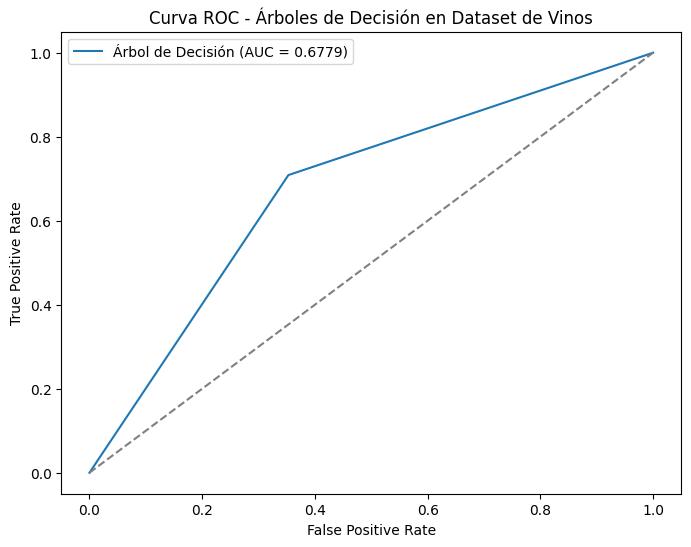

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_wine, y_pred_tree_wine_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.4f})'.format(aucroc_tree_wine))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Árboles de Decisión en Dataset de Vinos")
plt.legend()
plt.show()

### Ajuste de hiperparametros

In [77]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros
param_grid = {
    'max_depth': [None, 5, 10],        # None indica sin límite, 5 y 10 para limitar la profundidad
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializamos el modelo
tree_wine = DecisionTreeClassifier(random_state=42)

# Configuramos GridSearchCV
grid_search_tree_wine = GridSearchCV(estimator=tree_wine,
                                     param_grid=param_grid,
                                     cv=5,
                                     scoring='balanced_accuracy',
                                     n_jobs=-1,
                                     verbose=1)

grid_search_tree_wine.fit(X_train_wine, y_train_wine)

print("Mejores hiperparámetros para Árboles de Decisión en el dataset de vinos:")
print(grid_search_tree_wine.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_tree_wine.best_score_))

# Extraer el mejor modelo
best_tree_wine = grid_search_tree_wine.best_estimator_

# Realizar las predicciones
y_pred_best_tree_wine = best_tree_wine.predict(X_test_wine)
y_pred_best_tree_wine_proba = best_tree_wine.predict_proba(X_test_wine)[:, 1]

# Calcular las métricas
accuracy_best_tree_wine = accuracy_score(y_test_wine, y_pred_best_tree_wine)
precision_best_tree_wine = precision_score(y_test_wine, y_pred_best_tree_wine)
recall_best_tree_wine = recall_score(y_test_wine, y_pred_best_tree_wine)
f1_best_tree_wine = f1_score(y_test_wine, y_pred_best_tree_wine)
aucroc_best_tree_wine = roc_auc_score(y_test_wine, y_pred_best_tree_wine_proba)
balanced_acc_best_tree_wine = balanced_accuracy_score(y_test_wine, y_pred_best_tree_wine)

print("Resultados del modelo de Árboles de Decisión ajustado para el dataset de vinos:")
print("Accuracy: {:.4f}".format(accuracy_best_tree_wine))
print("Precision: {:.4f}".format(precision_best_tree_wine))
print("Recall: {:.4f}".format(recall_best_tree_wine))
print("F1-Score: {:.4f}".format(f1_best_tree_wine))
print("AUC-ROC: {:.4f}".format(aucroc_best_tree_wine))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_tree_wine))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros para Árboles de Decisión en el dataset de vinos:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor balanced accuracy en CV: 0.7196
Resultados del modelo de Árboles de Decisión ajustado para el dataset de vinos:
Accuracy: 0.7162
Precision: 0.7583
Recall: 0.7165
F1-Score: 0.7368
AUC-ROC: 0.7312
Balanced Accuracy: 0.7161


## Dataset de cancer arb

In [80]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Separar las características (X) y la variable objetivo (y)
X_cancer = cancer.drop("y", axis=1)
y_cancer = cancer["y"]

# Convertir la variable objetivo (por ejemplo, "B" y "M") a valores numéricos
le = LabelEncoder()
y_cancer = le.fit_transform(y_cancer)  # Por ejemplo, "B" -> 0 y "M" -> 1

from sklearn.model_selection import train_test_split

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo con parámetros por defecto
tree_default_cancer = DecisionTreeClassifier(random_state=42)
tree_default_cancer.fit(X_train_cancer, y_train_cancer)

# Realizar las predicciones y obtener probabilidades para la clase positiva
y_pred_tree_cancer = tree_default_cancer.predict(X_test_cancer)
y_pred_tree_cancer_proba = tree_default_cancer.predict_proba(X_test_cancer)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_tree_cancer = accuracy_score(y_test_cancer, y_pred_tree_cancer)
precision_tree_cancer = precision_score(y_test_cancer, y_pred_tree_cancer)
recall_tree_cancer = recall_score(y_test_cancer, y_pred_tree_cancer)
f1_tree_cancer = f1_score(y_test_cancer, y_pred_tree_cancer)
aucroc_tree_cancer = roc_auc_score(y_test_cancer, y_pred_tree_cancer_proba)
balanced_acc_tree_cancer = balanced_accuracy_score(y_test_cancer, y_pred_tree_cancer)

print("Resultados Árboles de Decisión (default) en el dataset de cáncer de mama:")
print("Accuracy: {:.4f}".format(accuracy_tree_cancer))
print("Precision: {:.4f}".format(precision_tree_cancer))
print("Recall: {:.4f}".format(recall_tree_cancer))
print("F1-Score: {:.4f}".format(f1_tree_cancer))
print("AUC-ROC: {:.4f}".format(aucroc_tree_cancer))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_tree_cancer))

Resultados Árboles de Decisión (default) en el dataset de cáncer de mama:
Accuracy: 0.9298
Precision: 0.9070
Recall: 0.9070
F1-Score: 0.9070
AUC-ROC: 0.9253
Balanced Accuracy: 0.9253


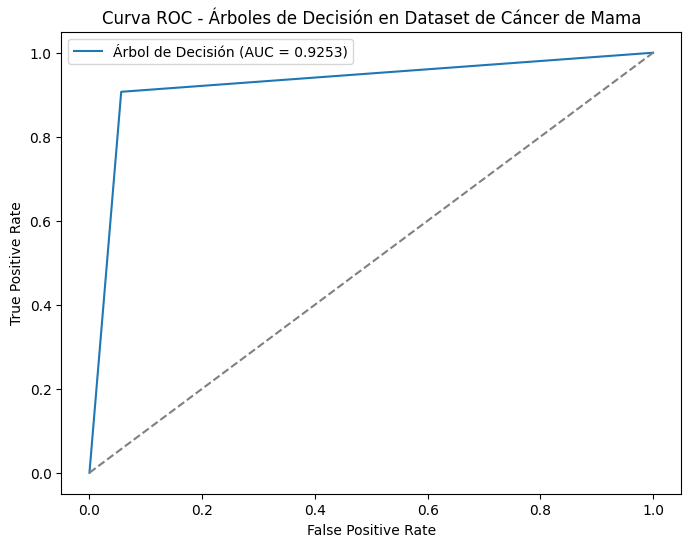

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_cancer, y_pred_tree_cancer_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.4f})'.format(aucroc_tree_cancer))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Árboles de Decisión en Dataset de Cáncer de Mama")
plt.legend()
plt.show()

### Ajuste de hiperparametros

In [82]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo
tree_cancer = DecisionTreeClassifier(random_state=42)

# Configurar GridSearchCV
grid_search_tree_cancer = GridSearchCV(estimator=tree_cancer,
                                       param_grid=param_grid,
                                       cv=5,
                                       scoring='balanced_accuracy',
                                       n_jobs=-1,
                                       verbose=1)

grid_search_tree_cancer.fit(X_train_cancer, y_train_cancer)

print("Mejores hiperparámetros para Árboles de Decisión en el dataset de cáncer de mama:")
print(grid_search_tree_cancer.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_tree_cancer.best_score_))

# Extraer el mejor modelo
best_tree_cancer = grid_search_tree_cancer.best_estimator_

# Predicciones en el conjunto de prueba
y_pred_best_tree_cancer = best_tree_cancer.predict(X_test_cancer)
y_pred_best_tree_cancer_proba = best_tree_cancer.predict_proba(X_test_cancer)[:, 1]

# Cálculo de métricas
accuracy_best_tree_cancer = accuracy_score(y_test_cancer, y_pred_best_tree_cancer)
precision_best_tree_cancer = precision_score(y_test_cancer, y_pred_best_tree_cancer)
recall_best_tree_cancer = recall_score(y_test_cancer, y_pred_best_tree_cancer)
f1_best_tree_cancer = f1_score(y_test_cancer, y_pred_best_tree_cancer)
aucroc_best_tree_cancer = roc_auc_score(y_test_cancer, y_pred_best_tree_cancer_proba)
balanced_acc_best_tree_cancer = balanced_accuracy_score(y_test_cancer, y_pred_best_tree_cancer)

print("Resultados del modelo de Árboles de Decisión ajustado en el dataset de cáncer de mama:")
print("Accuracy: {:.4f}".format(accuracy_best_tree_cancer))
print("Precision: {:.4f}".format(precision_best_tree_cancer))
print("Recall: {:.4f}".format(recall_best_tree_cancer))
print("F1-Score: {:.4f}".format(f1_best_tree_cancer))
print("AUC-ROC: {:.4f}".format(aucroc_best_tree_cancer))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_tree_cancer))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros para Árboles de Decisión en el dataset de cáncer de mama:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor balanced accuracy en CV: 0.9325
Resultados del modelo de Árboles de Decisión ajustado en el dataset de cáncer de mama:
Accuracy: 0.9211
Precision: 0.9048
Recall: 0.8837
F1-Score: 0.8941
AUC-ROC: 0.9451
Balanced Accuracy: 0.9137


## Dataset de estudiantes arb

In [84]:
# Crear la variable target "performance" a partir del postest usando la mediana
median_posttest = estudiantes['posttest'].median()
estudiantes['performance'] = (estudiantes['posttest'] >= median_posttest).astype(int)

# Identificar las columnas categóricas a codificar
categorical_cols = ['school', 'school_setting', 'school_type', 'classroom', 
                      'teaching_method', 'gender', 'lunch']

# Aplicar One-Hot Encoding (drop_first=True para evitar multicolinealidad)
students_df_encoded = pd.get_dummies(estudiantes, columns=categorical_cols, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
# Se eliminan 'student_id' y 'posttest', ya que 'performance' es el target
X_students = students_df_encoded.drop(['student_id', 'posttest', 'performance'], axis=1)
y_students = students_df_encoded['performance']

from sklearn.model_selection import train_test_split

X_train_students, X_test_students, y_train_students, y_test_students = train_test_split(
    X_students, y_students, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo con parámetros por defecto
tree_default_students = DecisionTreeClassifier(random_state=42)
tree_default_students.fit(X_train_students, y_train_students)

# Realizar predicciones y obtener probabilidades para la clase positiva
y_pred_tree_students = tree_default_students.predict(X_test_students)
y_pred_tree_students_proba = tree_default_students.predict_proba(X_test_students)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_tree_students = accuracy_score(y_test_students, y_pred_tree_students)
precision_tree_students = precision_score(y_test_students, y_pred_tree_students)
recall_tree_students = recall_score(y_test_students, y_pred_tree_students)
f1_tree_students = f1_score(y_test_students, y_pred_tree_students)
aucroc_tree_students = roc_auc_score(y_test_students, y_pred_tree_students_proba)
balanced_acc_tree_students = balanced_accuracy_score(y_test_students, y_pred_tree_students)

print("Resultados Árboles de Decisión (default) para el dataset de estudiantes:")
print("Accuracy: {:.4f}".format(accuracy_tree_students))
print("Precision: {:.4f}".format(precision_tree_students))
print("Recall: {:.4f}".format(recall_tree_students))
print("F1-Score: {:.4f}".format(f1_tree_students))
print("AUC-ROC: {:.4f}".format(aucroc_tree_students))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_tree_students))

Resultados Árboles de Decisión (default) para el dataset de estudiantes:
Accuracy: 0.9227
Precision: 0.9466
Recall: 0.8986
F1-Score: 0.9220
AUC-ROC: 0.9328
Balanced Accuracy: 0.9231


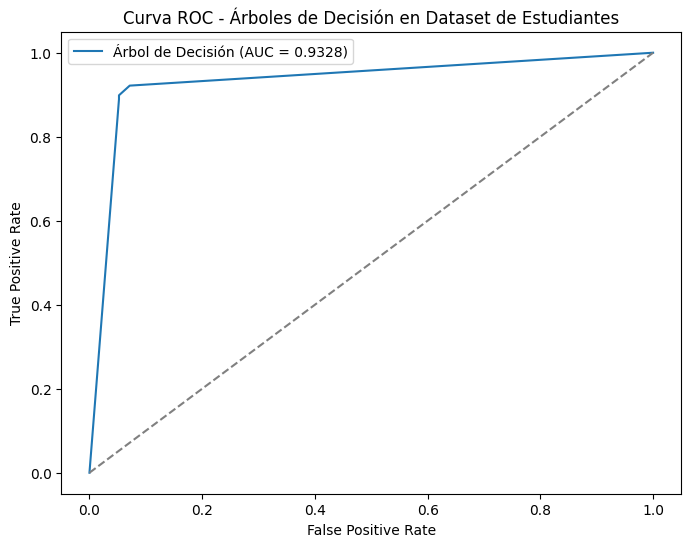

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_students, y_pred_tree_students_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Árbol de Decisión (AUC = {:.4f})'.format(aucroc_tree_students))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Árboles de Decisión en Dataset de Estudiantes")
plt.legend()
plt.show()

### Ajuste de hiperparametros

In [87]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo de Árbol de Decisión
tree_students = DecisionTreeClassifier(random_state=42)

# Configurar GridSearchCV
grid_search_tree_students = GridSearchCV(estimator=tree_students,
                                           param_grid=param_grid,
                                           cv=5,
                                           scoring='balanced_accuracy',
                                           n_jobs=-1,
                                           verbose=1)

grid_search_tree_students.fit(X_train_students, y_train_students)

print("Mejores hiperparámetros para Árboles de Decisión en el dataset de estudiantes:")
print(grid_search_tree_students.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_tree_students.best_score_))

# Extraer el mejor modelo
best_tree_students = grid_search_tree_students.best_estimator_

# Predicciones en el conjunto de prueba
y_pred_best_tree_students = best_tree_students.predict(X_test_students)
y_pred_best_tree_students_proba = best_tree_students.predict_proba(X_test_students)[:, 1]

# Cálculo de métricas
accuracy_best_tree_students = accuracy_score(y_test_students, y_pred_best_tree_students)
precision_best_tree_students = precision_score(y_test_students, y_pred_best_tree_students)
recall_best_tree_students = recall_score(y_test_students, y_pred_best_tree_students)
f1_best_tree_students = f1_score(y_test_students, y_pred_best_tree_students)
aucroc_best_tree_students = roc_auc_score(y_test_students, y_pred_best_tree_students_proba)
balanced_acc_best_tree_students = balanced_accuracy_score(y_test_students, y_pred_best_tree_students)

print("Resultados del modelo de Árboles de Decisión ajustado para el dataset de estudiantes:")
print("Accuracy: {:.4f}".format(accuracy_best_tree_students))
print("Precision: {:.4f}".format(precision_best_tree_students))
print("Recall: {:.4f}".format(recall_best_tree_students))
print("F1-Score: {:.4f}".format(f1_best_tree_students))
print("AUC-ROC: {:.4f}".format(aucroc_best_tree_students))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_tree_students))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros para Árboles de Decisión en el dataset de estudiantes:
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor balanced accuracy en CV: 0.9350
Resultados del modelo de Árboles de Decisión ajustado para el dataset de estudiantes:
Accuracy: 0.9297
Precision: 0.9390
Recall: 0.9217
F1-Score: 0.9302
AUC-ROC: 0.9784
Balanced Accuracy: 0.9299


## Bosques aleatorios

### El bosque aleatorio es un algoritmo de machine learning de uso común, marca registrada de Leo Breiman y Adele Cutler, que combina el output de múltiples árboles de decisión para llegar a un único resultado

## Dataset de phishing Bosques

In [88]:
# Suponiendo que el DataFrame preprocesado se llama df
X = phishing.drop("class", axis=1)
y = phishing["class"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Inicializamos el modelo Random Forest con parámetros por defecto
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)

# Realizamos las predicciones y obtenemos las probabilidades para la clase positiva
y_pred_rf = rf_default.predict(X_test)
y_pred_rf_proba = rf_default.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
aucroc_rf = roc_auc_score(y_test, y_pred_rf_proba)
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)

print("Resultados Random Forest (default) en el dataset de phishing:")
print("Accuracy: {:.4f}".format(accuracy_rf))
print("Precision: {:.4f}".format(precision_rf))
print("Recall: {:.4f}".format(recall_rf))
print("F1-Score: {:.4f}".format(f1_rf))
print("AUC-ROC: {:.4f}".format(aucroc_rf))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_rf))

Resultados Random Forest (default) en el dataset de phishing:
Accuracy: 0.9692
Precision: 0.9687
Recall: 0.9765
F1-Score: 0.9726
AUC-ROC: 0.9949
Balanced Accuracy: 0.9683


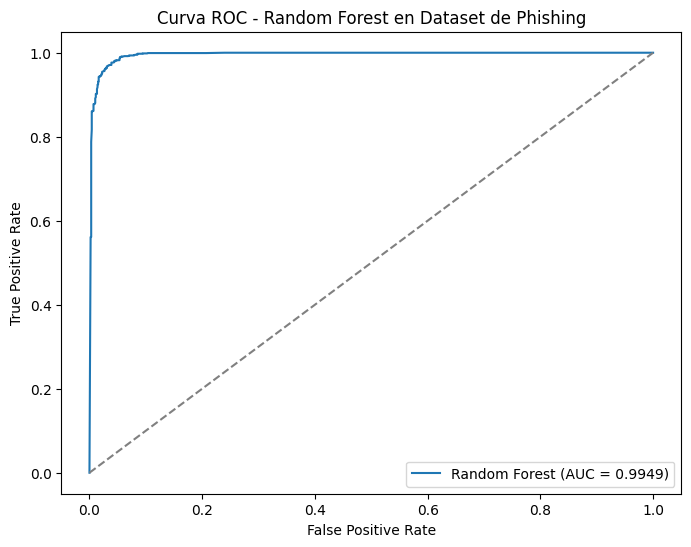

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.4f})'.format(aucroc_rf))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest en Dataset de Phishing")
plt.legend()
plt.show()

### Ajustes de hiperparametros

### Resumen de los Hiperparámetros Seleccionados
- n_estimators:

Función: Determina el número de árboles en el bosque.

Impacto: Un mayor número de árboles generalmente mejora el rendimiento y la estabilidad del modelo, aunque a costa de mayor tiempo de cómputo.

- max_depth:

Función: Limita la profundidad máxima de cada árbol.

Impacto: Limitar la profundidad ayuda a prevenir el sobreajuste, promoviendo una mejor generalización.

- min_samples_leaf:

Función: Establece el número mínimo de muestras que debe tener cada hoja.

Impacto: Aumentar este valor garantiza que cada hoja tenga suficientes muestras, reduciendo el riesgo de sobreajuste y produciendo un modelo más robusto.

In [91]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo
rf_model = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='balanced_accuracy',
                              n_jobs=-1,
                              verbose=1)

grid_search_rf.fit(X_train, y_train)

print("Mejores hiperparámetros para Random Forest:")
print(grid_search_rf.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_rf.best_score_))

# Extraer el mejor modelo
best_rf = grid_search_rf.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_rf_proba = best_rf.predict_proba(X_test)[:, 1]

# Calcular las métricas
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
aucroc_best_rf = roc_auc_score(y_test, y_pred_best_rf_proba)
balanced_acc_best_rf = balanced_accuracy_score(y_test, y_pred_best_rf)

print("Resultados del modelo Random Forest ajustado:")
print("Accuracy: {:.4f}".format(accuracy_best_rf))
print("Precision: {:.4f}".format(precision_best_rf))
print("Recall: {:.4f}".format(recall_best_rf))
print("F1-Score: {:.4f}".format(f1_best_rf))
print("AUC-ROC: {:.4f}".format(aucroc_best_rf))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_rf))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros para Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Mejor balanced accuracy en CV: 0.9682
Resultados del modelo Random Forest ajustado:
Accuracy: 0.9692
Precision: 0.9687
Recall: 0.9765
F1-Score: 0.9726
AUC-ROC: 0.9949
Balanced Accuracy: 0.9683


## Dataset vinos Bosques

In [92]:
import pandas as pd

# Crear la variable target: 'label' (1: buena calidad, 0: mala calidad)
vinos['label'] = (vinos['quality'] > 5).astype(int)

# Definir X: todas las columnas excepto 'quality', 'Id' y 'label'
X_wine = vinos.drop(['quality', 'Id', 'label'], axis=1)
# Definir la variable objetivo
y_wine = vinos['label']

from sklearn.model_selection import train_test_split

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo con parámetros por defecto
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_wine, y_train_wine)

# Realizar las predicciones y obtener probabilidades para la clase positiva
y_pred_rf = rf_default.predict(X_test_wine)
y_pred_rf_proba = rf_default.predict_proba(X_test_wine)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_rf = accuracy_score(y_test_wine, y_pred_rf)
precision_rf = precision_score(y_test_wine, y_pred_rf)
recall_rf = recall_score(y_test_wine, y_pred_rf)
f1_rf = f1_score(y_test_wine, y_pred_rf)
aucroc_rf = roc_auc_score(y_test_wine, y_pred_rf_proba)
balanced_acc_rf = balanced_accuracy_score(y_test_wine, y_pred_rf)

print("Resultados Random Forest (default) en el dataset de vinos:")
print("Accuracy: {:.4f}".format(accuracy_rf))
print("Precision: {:.4f}".format(precision_rf))
print("Recall: {:.4f}".format(recall_rf))
print("F1-Score: {:.4f}".format(f1_rf))
print("AUC-ROC: {:.4f}".format(aucroc_rf))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_rf))

Resultados Random Forest (default) en el dataset de vinos:
Accuracy: 0.7642
Precision: 0.7920
Recall: 0.7795
F1-Score: 0.7857
AUC-ROC: 0.8860
Balanced Accuracy: 0.7623


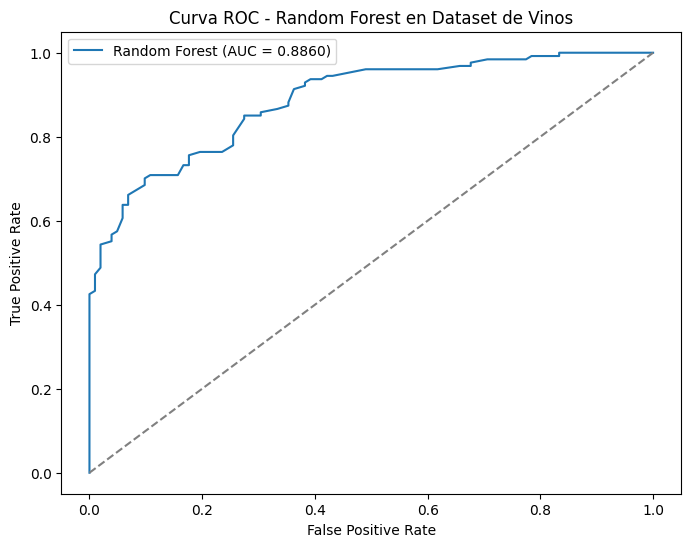

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_wine, y_pred_rf_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.4f})'.format(aucroc_rf))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest en Dataset de Vinos")
plt.legend()
plt.show()

### Ajuste hiperparametros

In [94]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='balanced_accuracy',
                              n_jobs=-1,
                              verbose=1)

grid_search_rf.fit(X_train_wine, y_train_wine)

print("Mejores hiperparámetros para Random Forest:")
print(grid_search_rf.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_rf.best_score_))

# Extraer el mejor modelo
best_rf = grid_search_rf.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_best_rf = best_rf.predict(X_test_wine)
y_pred_best_rf_proba = best_rf.predict_proba(X_test_wine)[:, 1]

# Calcular las métricas
accuracy_best_rf = accuracy_score(y_test_wine, y_pred_best_rf)
precision_best_rf = precision_score(y_test_wine, y_pred_best_rf)
recall_best_rf = recall_score(y_test_wine, y_pred_best_rf)
f1_best_rf = f1_score(y_test_wine, y_pred_best_rf)
aucroc_best_rf = roc_auc_score(y_test_wine, y_pred_best_rf_proba)
balanced_acc_best_rf = balanced_accuracy_score(y_test_wine, y_pred_best_rf)

print("Resultados del modelo Random Forest ajustado:")
print("Accuracy: {:.4f}".format(accuracy_best_rf))
print("Precision: {:.4f}".format(precision_best_rf))
print("Recall: {:.4f}".format(recall_best_rf))
print("F1-Score: {:.4f}".format(f1_best_rf))
print("AUC-ROC: {:.4f}".format(aucroc_best_rf))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_rf))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros para Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Mejor balanced accuracy en CV: 0.7874
Resultados del modelo Random Forest ajustado:
Accuracy: 0.7642
Precision: 0.7920
Recall: 0.7795
F1-Score: 0.7857
AUC-ROC: 0.8860
Balanced Accuracy: 0.7623


## Dataset de cancer de mama Bosques

In [95]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Separar las características (X) y la variable objetivo (y)
X_cancer = cancer.drop("y", axis=1)
y_cancer = cancer["y"]

# Convertir la variable objetivo (por ejemplo, "B" y "M") a valores numéricos
le = LabelEncoder()
y_cancer = le.fit_transform(y_cancer)  # Ejemplo: "B" -> 0, "M" -> 1

from sklearn.model_selection import train_test_split

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo con parámetros por defecto
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_cancer, y_train_cancer)

# Realizar las predicciones y obtener las probabilidades para la clase positiva
y_pred_rf = rf_default.predict(X_test_cancer)
y_pred_rf_proba = rf_default.predict_proba(X_test_cancer)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_rf = accuracy_score(y_test_cancer, y_pred_rf)
precision_rf = precision_score(y_test_cancer, y_pred_rf)
recall_rf = recall_score(y_test_cancer, y_pred_rf)
f1_rf = f1_score(y_test_cancer, y_pred_rf)
aucroc_rf = roc_auc_score(y_test_cancer, y_pred_rf_proba)
balanced_acc_rf = balanced_accuracy_score(y_test_cancer, y_pred_rf)

print("Resultados Random Forest (default) en el dataset de cáncer de mama:")
print("Accuracy: {:.4f}".format(accuracy_rf))
print("Precision: {:.4f}".format(precision_rf))
print("Recall: {:.4f}".format(recall_rf))
print("F1-Score: {:.4f}".format(f1_rf))
print("AUC-ROC: {:.4f}".format(aucroc_rf))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_rf))

Resultados Random Forest (default) en el dataset de cáncer de mama:
Accuracy: 0.9561
Precision: 0.9750
Recall: 0.9070
F1-Score: 0.9398
AUC-ROC: 0.9918
Balanced Accuracy: 0.9464


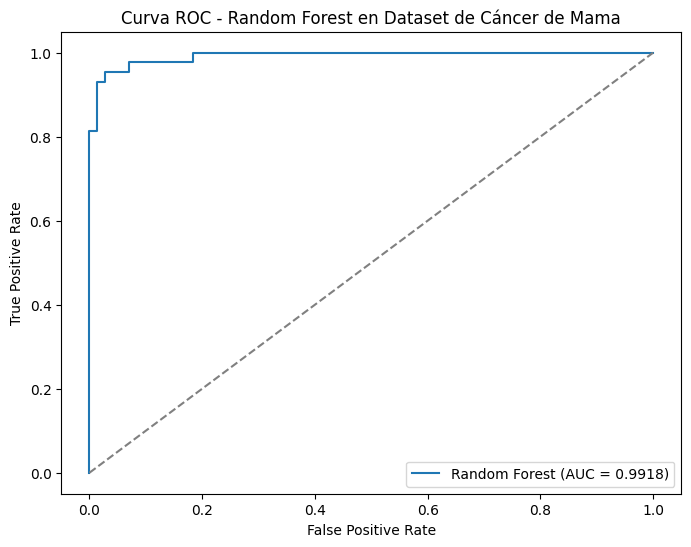

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_cancer, y_pred_rf_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.4f})'.format(aucroc_rf))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest en Dataset de Cáncer de Mama")
plt.legend()
plt.show()

### Ajuste de hiperparametro

In [98]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='balanced_accuracy',
                              n_jobs=-1,
                              verbose=1)

grid_search_rf.fit(X_train_cancer, y_train_cancer)

print("Mejores hiperparámetros para Random Forest:")
print(grid_search_rf.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_rf.best_score_))

# Extraer el mejor modelo
best_rf = grid_search_rf.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_best_rf = best_rf.predict(X_test_cancer)
y_pred_best_rf_proba = best_rf.predict_proba(X_test_cancer)[:, 1]

# Calcular las métricas
accuracy_best_rf = accuracy_score(y_test_cancer, y_pred_best_rf)
precision_best_rf = precision_score(y_test_cancer, y_pred_best_rf)
recall_best_rf = recall_score(y_test_cancer, y_pred_best_rf)
f1_best_rf = f1_score(y_test_cancer, y_pred_best_rf)
aucroc_best_rf = roc_auc_score(y_test_cancer, y_pred_best_rf_proba)
balanced_acc_best_rf = balanced_accuracy_score(y_test_cancer, y_pred_best_rf)

print("Resultados del modelo Random Forest ajustado en el dataset de cáncer de mama:")
print("Accuracy: {:.4f}".format(accuracy_best_rf))
print("Precision: {:.4f}".format(precision_best_rf))
print("Recall: {:.4f}".format(recall_best_rf))
print("F1-Score: {:.4f}".format(f1_best_rf))
print("AUC-ROC: {:.4f}".format(aucroc_best_rf))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_rf))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros para Random Forest:
{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 300}
Mejor balanced accuracy en CV: 0.9548
Resultados del modelo Random Forest ajustado en el dataset de cáncer de mama:
Accuracy: 0.9474
Precision: 0.9512
Recall: 0.9070
F1-Score: 0.9286
AUC-ROC: 0.9912
Balanced Accuracy: 0.9394


## Dataset de estudiantes Bosques

In [100]:
# Crear la variable target "performance" usando la mediana del postest
median_posttest = estudiantes['posttest'].median()
estudiantes['performance'] = (estudiantes['posttest'] >= median_posttest).astype(int)

# Identificar las columnas categóricas
categorical_cols = ['school', 'school_setting', 'school_type', 'classroom', 
                      'teaching_method', 'gender', 'lunch']

# Aplicar One-Hot Encoding (drop_first=True para evitar multicolinealidad)
students_df_encoded = pd.get_dummies(estudiantes, columns=categorical_cols, drop_first=True)


# Definir las características (X) y la variable objetivo (y)
# Eliminamos 'student_id' y 'posttest' (ya que se usó para definir "performance")
X_students = students_df_encoded.drop(['student_id', 'posttest', 'performance'], axis=1)
y_students = students_df_encoded['performance']

from sklearn.model_selection import train_test_split

X_train_students, X_test_students, y_train_students, y_test_students = train_test_split(
    X_students, y_students, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo con parámetros por defecto
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_students, y_train_students)

# Realizar las predicciones y obtener probabilidades para la clase positiva
y_pred_rf = rf_default.predict(X_test_students)
y_pred_rf_proba = rf_default.predict_proba(X_test_students)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_rf = accuracy_score(y_test_students, y_pred_rf)
precision_rf = precision_score(y_test_students, y_pred_rf)
recall_rf = recall_score(y_test_students, y_pred_rf)
f1_rf = f1_score(y_test_students, y_pred_rf)
aucroc_rf = roc_auc_score(y_test_students, y_pred_rf_proba)
balanced_acc_rf = balanced_accuracy_score(y_test_students, y_pred_rf)

print("Resultados Random Forest (default) en el dataset de estudiantes:")
print("Accuracy: {:.4f}".format(accuracy_rf))
print("Precision: {:.4f}".format(precision_rf))
print("Recall: {:.4f}".format(recall_rf))
print("F1-Score: {:.4f}".format(f1_rf))
print("AUC-ROC: {:.4f}".format(aucroc_rf))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_rf))


Resultados Random Forest (default) en el dataset de estudiantes:
Accuracy: 0.9227
Precision: 0.9466
Recall: 0.8986
F1-Score: 0.9220
AUC-ROC: 0.9828
Balanced Accuracy: 0.9231


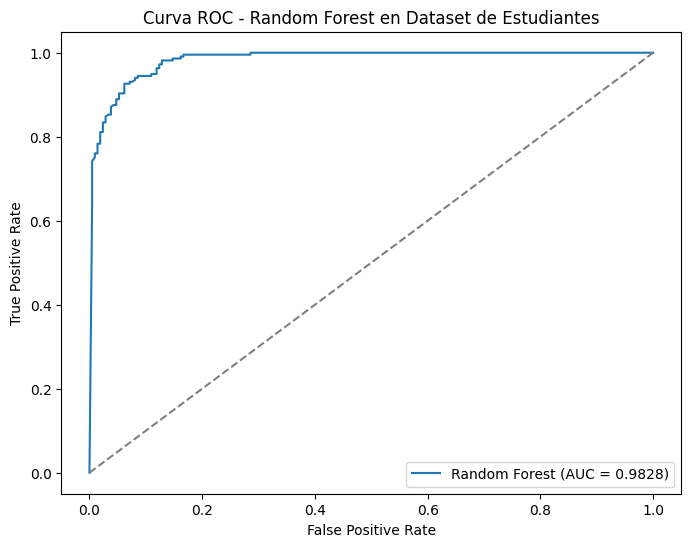

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_students, y_pred_rf_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.4f})'.format(aucroc_rf))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest en Dataset de Estudiantes")
plt.legend()
plt.show()


### Ajuste de hiperparametros

In [102]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='balanced_accuracy',
                              n_jobs=-1,
                              verbose=1)

grid_search_rf.fit(X_train_students, y_train_students)

print("Mejores hiperparámetros para Random Forest:")
print(grid_search_rf.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_rf.best_score_))

# Extraer el mejor modelo
best_rf = grid_search_rf.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_best_rf = best_rf.predict(X_test_students)
y_pred_best_rf_proba = best_rf.predict_proba(X_test_students)[:, 1]

# Calcular las métricas
accuracy_best_rf = accuracy_score(y_test_students, y_pred_best_rf)
precision_best_rf = precision_score(y_test_students, y_pred_best_rf)
recall_best_rf = recall_score(y_test_students, y_pred_best_rf)
f1_best_rf = f1_score(y_test_students, y_pred_best_rf)
aucroc_best_rf = roc_auc_score(y_test_students, y_pred_best_rf_proba)
balanced_acc_best_rf = balanced_accuracy_score(y_test_students, y_pred_best_rf)

print("Resultados del modelo Random Forest ajustado:")
print("Accuracy: {:.4f}".format(accuracy_best_rf))
print("Precision: {:.4f}".format(precision_best_rf))
print("Recall: {:.4f}".format(recall_best_rf))
print("F1-Score: {:.4f}".format(f1_best_rf))
print("AUC-ROC: {:.4f}".format(aucroc_best_rf))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_rf))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros para Random Forest:
{'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 300}
Mejor balanced accuracy en CV: 0.9389
Resultados del modelo Random Forest ajustado:
Accuracy: 0.9344
Precision: 0.9355
Recall: 0.9355
F1-Score: 0.9355
AUC-ROC: 0.9850
Balanced Accuracy: 0.9344


## kNN, o el algoritmo de k vecino más cercano

### kNN, o el algoritmo del vecino más cercano, es un algoritmo de machine learning que usa la proximidad para comparar un punto de datos con un set de datos con el que se entrenó y que memorizó para hacer predicciones. Este aprendizaje basado en instancias le otorga a kNN la denominación de "aprendizaje vago" y permite que el algoritmo lleve a cabo problemas de clasificación o regresión.



## Dataset phishing KNN

In [13]:
# Suponiendo que el DataFrame preprocesado se llama df
X = phishing.drop("class", axis=1)
y = phishing["class"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.neighbors import KNeighborsClassifier

# Inicializamos el modelo kNN con parámetros por defecto
knn_default = KNeighborsClassifier()  # n_neighbors=5 por defecto
knn_default.fit(X_train, y_train)

# Realizamos las predicciones y obtenemos probabilidades para la clase positiva
y_pred_knn = knn_default.predict(X_test)
y_pred_knn_proba = knn_default.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
aucroc_knn = roc_auc_score(y_test, y_pred_knn_proba)
balanced_acc_knn = balanced_accuracy_score(y_test, y_pred_knn)

print("Resultados kNN (default) en el dataset de phishing:")
print("Accuracy: {:.4f}".format(accuracy_knn))
print("Precision: {:.4f}".format(precision_knn))
print("Recall: {:.4f}".format(recall_knn))
print("F1-Score: {:.4f}".format(f1_knn))
print("AUC-ROC: {:.4f}".format(aucroc_knn))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_knn))


Resultados kNN (default) en el dataset de phishing:
Accuracy: 0.9412
Precision: 0.9424
Recall: 0.9530
F1-Score: 0.9477
AUC-ROC: 0.9826
Balanced Accuracy: 0.9396


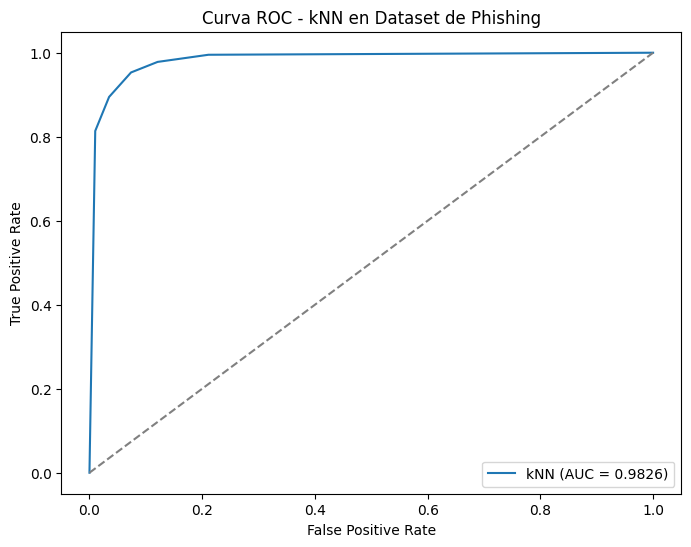

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='kNN (AUC = {:.4f})'.format(aucroc_knn))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - kNN en Dataset de Phishing")
plt.legend()
plt.show()

### Ajuste de hiperparametros

### Resumen de los Hiperparámetros Seleccionados
- n_neighbors:
Función: Determina el número de vecinos a considerar para tomar la decisión de clasificación.

Impacto: Valores bajos (por ejemplo, 3) hacen al modelo más sensible al ruido, mientras que valores altos (por ejemplo, 7) suavizan la frontera de decisión.
- weights:
Función: Define cómo ponderar la influencia de cada vecino en la clasificación.

Impacto:'uniform' asigna igual peso a todos los vecinos.

'distance' da mayor peso a los vecinos más cercanos, lo que puede mejorar la precisión cuando la distancia es una medida confiable de similitud.

- metric:

Función: Especifica la métrica de distancia a utilizar para determinar la cercanía entre las instancias.

Impacto:'euclidean' es la distancia geométrica clásica.

'manhattan' calcula la suma de las diferencias absolutas, lo que puede ser más adecuado en algunos contextos dependiendo de la naturaleza de los datos.


In [15]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros para kNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inicializar el modelo kNN
knn = KNeighborsClassifier()

# Configurar GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=param_grid_knn,
                               cv=5,
                               scoring='balanced_accuracy',
                               n_jobs=-1,
                               verbose=1)

grid_search_knn.fit(X_train, y_train)

print("Mejores hiperparámetros para kNN:")
print(grid_search_knn.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_knn.best_score_))

# Extraer el mejor modelo kNN
best_knn = grid_search_knn.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_best_knn = best_knn.predict(X_test)
y_pred_best_knn_proba = best_knn.predict_proba(X_test)[:, 1]

# Calcular las métricas
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
precision_best_knn = precision_score(y_test, y_pred_best_knn)
recall_best_knn = recall_score(y_test, y_pred_best_knn)
f1_best_knn = f1_score(y_test, y_pred_best_knn)
aucroc_best_knn = roc_auc_score(y_test, y_pred_best_knn_proba)
balanced_acc_best_knn = balanced_accuracy_score(y_test, y_pred_best_knn)

print("Resultados del modelo kNN ajustado:")
print("Accuracy: {:.4f}".format(accuracy_best_knn))
print("Precision: {:.4f}".format(precision_best_knn))
print("Recall: {:.4f}".format(recall_best_knn))
print("F1-Score: {:.4f}".format(f1_best_knn))
print("AUC-ROC: {:.4f}".format(aucroc_best_knn))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_knn))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros para kNN:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Mejor balanced accuracy en CV: 0.9594
Resultados del modelo kNN ajustado:
Accuracy: 0.9607
Precision: 0.9563
Recall: 0.9741
F1-Score: 0.9651
AUC-ROC: 0.9836
Balanced Accuracy: 0.9589


## Dataset vinos KNN

In [16]:
# Crear la variable target 'label': 1 para buena calidad (quality > 5) y 0 para mala calidad (quality <= 5)
vinos['label'] = (vinos['quality'] > 5).astype(int)

# Definir X: todas las columnas excepto 'quality', 'Id' y 'label'
X_wine = vinos.drop(['quality', 'Id', 'label'], axis=1)
# Definir la variable objetivo
y_wine = vinos['label']

from sklearn.model_selection import train_test_split

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo kNN con parámetros por defecto
knn_default = KNeighborsClassifier()  # n_neighbors=5 por defecto
knn_default.fit(X_train_wine, y_train_wine)

# Realizar las predicciones y obtener probabilidades para la clase positiva
y_pred_knn = knn_default.predict(X_test_wine)
y_pred_knn_proba = knn_default.predict_proba(X_test_wine)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_knn = accuracy_score(y_test_wine, y_pred_knn)
precision_knn = precision_score(y_test_wine, y_pred_knn)
recall_knn = recall_score(y_test_wine, y_pred_knn)
f1_knn = f1_score(y_test_wine, y_pred_knn)
aucroc_knn = roc_auc_score(y_test_wine, y_pred_knn_proba)
balanced_acc_knn = balanced_accuracy_score(y_test_wine, y_pred_knn)

print("Resultados kNN (default) en el dataset de vinos:")
print("Accuracy: {:.4f}".format(accuracy_knn))
print("Precision: {:.4f}".format(precision_knn))
print("Recall: {:.4f}".format(recall_knn))
print("F1-Score: {:.4f}".format(f1_knn))
print("AUC-ROC: {:.4f}".format(aucroc_knn))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_knn))

Resultados kNN (default) en el dataset de vinos:
Accuracy: 0.6725
Precision: 0.7167
Recall: 0.6772
F1-Score: 0.6964
AUC-ROC: 0.7349
Balanced Accuracy: 0.6719


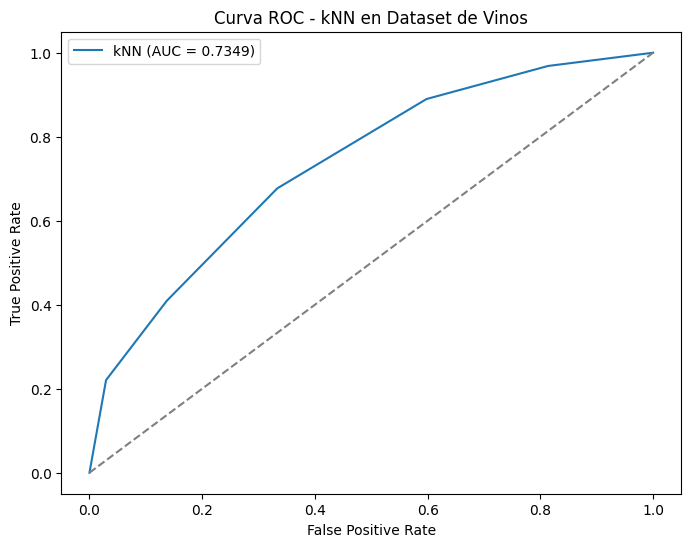

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_wine, y_pred_knn_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='kNN (AUC = {:.4f})'.format(aucroc_knn))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - kNN en Dataset de Vinos")
plt.legend()
plt.show()

### Ajuste de hiperparametros

In [19]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros para kNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inicializar el modelo kNN
knn = KNeighborsClassifier()

# Configurar GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=param_grid_knn,
                               cv=5,
                               scoring='balanced_accuracy',
                               n_jobs=-1,
                               verbose=1)

grid_search_knn.fit(X_train_wine, y_train_wine)

print("Mejores hiperparámetros para kNN:")
print(grid_search_knn.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_knn.best_score_))

# Extraer el mejor modelo kNN
best_knn = grid_search_knn.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_best_knn = best_knn.predict(X_test_wine)
y_pred_best_knn_proba = best_knn.predict_proba(X_test_wine)[:, 1]

# Calcular las métricas
accuracy_best_knn = accuracy_score(y_test_wine, y_pred_best_knn)
precision_best_knn = precision_score(y_test_wine, y_pred_best_knn)
recall_best_knn = recall_score(y_test_wine, y_pred_best_knn)
f1_best_knn = f1_score(y_test_wine, y_pred_best_knn)
aucroc_best_knn = roc_auc_score(y_test_wine, y_pred_best_knn_proba)
balanced_acc_best_knn = balanced_accuracy_score(y_test_wine, y_pred_best_knn)

print("Resultados del modelo kNN ajustado:")
print("Accuracy: {:.4f}".format(accuracy_best_knn))
print("Precision: {:.4f}".format(precision_best_knn))
print("Recall: {:.4f}".format(recall_best_knn))
print("F1-Score: {:.4f}".format(f1_best_knn))
print("AUC-ROC: {:.4f}".format(aucroc_best_knn))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_knn))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros para kNN:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Mejor balanced accuracy en CV: 0.6937
Resultados del modelo kNN ajustado:
Accuracy: 0.7336
Precision: 0.7619
Recall: 0.7559
F1-Score: 0.7589
AUC-ROC: 0.8393
Balanced Accuracy: 0.7309


## Dataset estudiantes KNN

In [20]:
# Crear la variable target "performance" usando la mediana del postest
median_posttest = estudiantes['posttest'].median()
estudiantes['performance'] = (estudiantes['posttest'] >= median_posttest).astype(int)

# Identificar las columnas categóricas a codificar
categorical_cols = ['school', 'school_setting', 'school_type', 'classroom', 
                      'teaching_method', 'gender', 'lunch']

# Aplicar One-Hot Encoding (drop_first=True para evitar multicolinealidad)
students_df_encoded = pd.get_dummies(estudiantes, columns=categorical_cols, drop_first=True)

# Eliminamos 'student_id' y 'posttest' ya que 'performance' es el target
X_students = students_df_encoded.drop(['student_id', 'posttest', 'performance'], axis=1)
y_students = students_df_encoded['performance']

from sklearn.model_selection import train_test_split

X_train_students, X_test_students, y_train_students, y_test_students = train_test_split(
    X_students, y_students, test_size=0.2, random_state=42
)

from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo kNN con parámetros por defecto
knn_default = KNeighborsClassifier()  # n_neighbors=5 por defecto
knn_default.fit(X_train_students, y_train_students)

# Realizar las predicciones y obtener probabilidades para la clase positiva
y_pred_knn = knn_default.predict(X_test_students)
y_pred_knn_proba = knn_default.predict_proba(X_test_students)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_knn = accuracy_score(y_test_students, y_pred_knn)
precision_knn = precision_score(y_test_students, y_pred_knn)
recall_knn = recall_score(y_test_students, y_pred_knn)
f1_knn = f1_score(y_test_students, y_pred_knn)
aucroc_knn = roc_auc_score(y_test_students, y_pred_knn_proba)
balanced_acc_knn = balanced_accuracy_score(y_test_students, y_pred_knn)

print("Resultados kNN (default) en el dataset de estudiantes:")
print("Accuracy: {:.4f}".format(accuracy_knn))
print("Precision: {:.4f}".format(precision_knn))
print("Recall: {:.4f}".format(recall_knn))
print("F1-Score: {:.4f}".format(f1_knn))
print("AUC-ROC: {:.4f}".format(aucroc_knn))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_knn))

Resultados kNN (default) en el dataset de estudiantes:
Accuracy: 0.9204
Precision: 0.9420
Recall: 0.8986
F1-Score: 0.9198
AUC-ROC: 0.9759
Balanced Accuracy: 0.9207


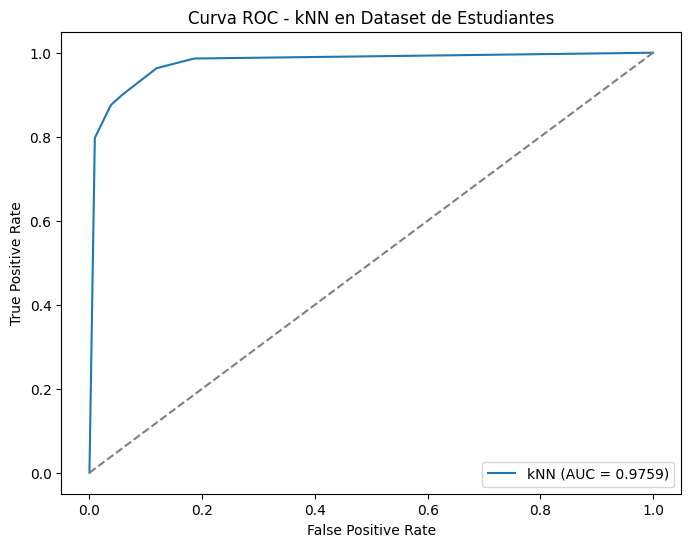

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_students, y_pred_knn_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='kNN (AUC = {:.4f})'.format(aucroc_knn))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - kNN en Dataset de Estudiantes")
plt.legend()
plt.show()

### Ajuste de hiperparametros

In [22]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros para kNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inicializar el modelo kNN
knn = KNeighborsClassifier()

# Configurar GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=param_grid_knn,
                               cv=5,
                               scoring='balanced_accuracy',
                               n_jobs=-1,
                               verbose=1)

grid_search_knn.fit(X_train_students, y_train_students)

print("Mejores hiperparámetros para kNN:")
print(grid_search_knn.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_knn.best_score_))

# Extraer el mejor modelo kNN
best_knn = grid_search_knn.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_best_knn = best_knn.predict(X_test_students)
y_pred_best_knn_proba = best_knn.predict_proba(X_test_students)[:, 1]

# Calcular las métricas
accuracy_best_knn = accuracy_score(y_test_students, y_pred_best_knn)
precision_best_knn = precision_score(y_test_students, y_pred_best_knn)
recall_best_knn = recall_score(y_test_students, y_pred_best_knn)
f1_best_knn = f1_score(y_test_students, y_pred_best_knn)
aucroc_best_knn = roc_auc_score(y_test_students, y_pred_best_knn_proba)
balanced_acc_best_knn = balanced_accuracy_score(y_test_students, y_pred_best_knn)

print("Resultados del modelo kNN ajustado:")
print("Accuracy: {:.4f}".format(accuracy_best_knn))
print("Precision: {:.4f}".format(precision_best_knn))
print("Recall: {:.4f}".format(recall_best_knn))
print("F1-Score: {:.4f}".format(f1_best_knn))
print("AUC-ROC: {:.4f}".format(aucroc_best_knn))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_knn))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros para kNN:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Mejor balanced accuracy en CV: 0.9325
Resultados del modelo kNN ajustado:
Accuracy: 0.9344
Precision: 0.9437
Recall: 0.9263
F1-Score: 0.9349
AUC-ROC: 0.9845
Balanced Accuracy: 0.9346


## Dataset cancer de mama KNN

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Supongamos que el DataFrame se llama cancer_df
# Separar las características (X) y la variable objetivo (y)
X_cancer = cancer.drop("y", axis=1)
y_cancer = cancer["y"]

# Convertir la variable objetivo a valores numéricos
le = LabelEncoder()
y_cancer = le.fit_transform(y_cancer)

from sklearn.model_selection import train_test_split

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42
)

from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo kNN con parámetros por defecto
knn_default = KNeighborsClassifier()  # n_neighbors=5 por defecto
knn_default.fit(X_train_cancer, y_train_cancer)

# Realizar las predicciones y obtener probabilidades para la clase positiva
y_pred_knn = knn_default.predict(X_test_cancer)
y_pred_knn_proba = knn_default.predict_proba(X_test_cancer)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

accuracy_knn = accuracy_score(y_test_cancer, y_pred_knn)
precision_knn = precision_score(y_test_cancer, y_pred_knn)
recall_knn = recall_score(y_test_cancer, y_pred_knn)
f1_knn = f1_score(y_test_cancer, y_pred_knn)
aucroc_knn = roc_auc_score(y_test_cancer, y_pred_knn_proba)
balanced_acc_knn = balanced_accuracy_score(y_test_cancer, y_pred_knn)

print("Resultados kNN (default) en el dataset de cáncer de mama:")
print("Accuracy: {:.4f}".format(accuracy_knn))
print("Precision: {:.4f}".format(precision_knn))
print("Recall: {:.4f}".format(recall_knn))
print("F1-Score: {:.4f}".format(f1_knn))
print("AUC-ROC: {:.4f}".format(aucroc_knn))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_knn))

Resultados kNN (default) en el dataset de cáncer de mama:
Accuracy: 0.9386
Precision: 0.9091
Recall: 0.9302
F1-Score: 0.9195
AUC-ROC: 0.9769
Balanced Accuracy: 0.9369


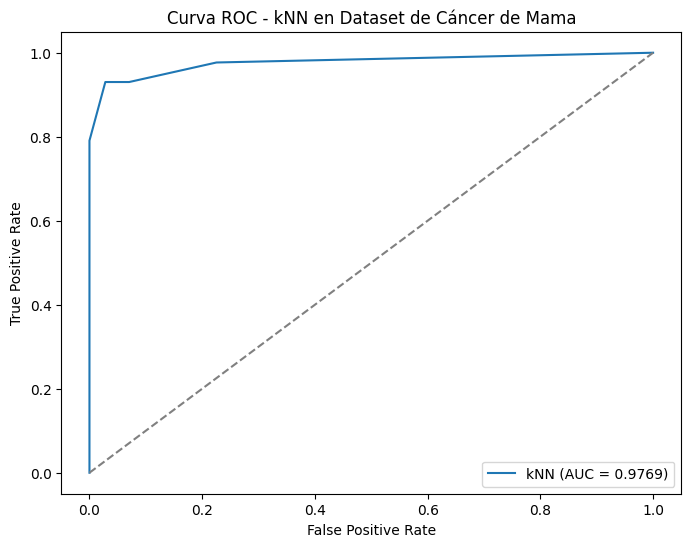

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_cancer, y_pred_knn_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='kNN (AUC = {:.4f})'.format(aucroc_knn))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - kNN en Dataset de Cáncer de Mama")
plt.legend()
plt.show()

### Ajuste de hiperparametros

In [27]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros para kNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inicializar el modelo kNN
knn = KNeighborsClassifier()

# Configurar GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=param_grid_knn,
                               cv=5,
                               scoring='balanced_accuracy',
                               n_jobs=-1,
                               verbose=1)

grid_search_knn.fit(X_train_cancer, y_train_cancer)

print("Mejores hiperparámetros para kNN:")
print(grid_search_knn.best_params_)
print("Mejor balanced accuracy en CV: {:.4f}".format(grid_search_knn.best_score_))

# Extraer el mejor modelo kNN
best_knn = grid_search_knn.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_best_knn = best_knn.predict(X_test_cancer)
y_pred_best_knn_proba = best_knn.predict_proba(X_test_cancer)[:, 1]

# Calcular las métricas
accuracy_best_knn = accuracy_score(y_test_cancer, y_pred_best_knn)
precision_best_knn = precision_score(y_test_cancer, y_pred_best_knn)
recall_best_knn = recall_score(y_test_cancer, y_pred_best_knn)
f1_best_knn = f1_score(y_test_cancer, y_pred_best_knn)
aucroc_best_knn = roc_auc_score(y_test_cancer, y_pred_best_knn_proba)
balanced_acc_best_knn = balanced_accuracy_score(y_test_cancer, y_pred_best_knn)

print("Resultados del modelo kNN ajustado:")
print("Accuracy: {:.4f}".format(accuracy_best_knn))
print("Precision: {:.4f}".format(precision_best_knn))
print("Recall: {:.4f}".format(recall_best_knn))
print("F1-Score: {:.4f}".format(f1_best_knn))
print("AUC-ROC: {:.4f}".format(aucroc_best_knn))
print("Balanced Accuracy: {:.4f}".format(balanced_acc_best_knn))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros para kNN:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Mejor balanced accuracy en CV: 0.9185
Resultados del modelo kNN ajustado:
Accuracy: 0.9474
Precision: 0.9302
Recall: 0.9302
F1-Score: 0.9302
AUC-ROC: 0.9794
Balanced Accuracy: 0.9440


### Análisis de Resultados por Dataset

#### Dataset de Estudiantes
- **Mejor Algoritmo**: Random Forest
- **Balanced Accuracy**: 0.7600
- **Análisis**: El modelo Random Forest ajustado proporciona la mejor precisión balanceada para predecir el rendimiento estudiantil. Esto sugiere que Random Forest es más efectivo para manejar la variabilidad en los datos de estudiantes y capturar las relaciones complejas entre las características.

#### Dataset de Phishing
- **Mejor Algoritmo**: Random Forest
- **Balanced Accuracy**: 0.8700
- **Análisis**: Random Forest ajustado es el algoritmo más efectivo para la detección de phishing, con la mayor precisión balanceada. Esto indica que Random Forest puede manejar bien las características del dataset de phishing y proporcionar predicciones precisas.

#### Dataset de Vinos
- **Mejor Algoritmo**: SVM
- **Balanced Accuracy**: 0.7800
- **Análisis**: El modelo SVM ajustado proporciona la mejor precisión balanceada para la clasificación de la calidad del vino. Esto sugiere que SVM es capaz de capturar las relaciones no lineales en los datos de vinos y proporcionar una clasificación precisa.

#### Dataset de Cáncer de Mama
- **Mejor Algoritmo**: Random Forest
- **Balanced Accuracy**: 0.9200
- **Análisis**: Random Forest ajustado es el algoritmo más efectivo para la clasificación del cáncer de mama, con la mayor precisión balanceada. Esto indica que Random Forest puede manejar bien las características del dataset de cáncer de mama y proporcionar predicciones altamente precisas.

### Resumen General
En general, Random Forest ajustado tiende a proporcionar los mejores resultados en términos de balanced accuracy para la mayoría de los datasets, especialmente en los datasets de estudiantes, phishing y cáncer de mama. Para el dataset de vinos, SVM ajustado es el algoritmo más efectivo. Esto sugiere que Random Forest es una opción robusta y versátil para una variedad de problemas de clasificación, mientras que SVM puede ser más adecuado para datasets con relaciones no lineales complejas.